## Business Understanding

**Research Question**

*1. What are the demographic factors that influence the chances of a client having difficulty repaying on a loan?*

*2. What are the top 10 factors for client with difficulty in paying the loan?*


***

# Data Understanding

## Library

In [ ]:
# Import library for the code
import numpy as np 
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt
import scipy.stats as stats

from factor_analyzer import FactorAnalyzer
from scipy.stats import kurtosis

## Load Data

In [267]:
# Loading the dataset
ad_df = pd.read_csv(r'\4. EDA\EDA+Project_Answer\Project Dataset (Option 1)\application_data.csv')
pa_df = pd.read_csv(r'4. EDA\EDA+Project_Answer\Project Dataset (Option 1)\previous_application.csv')
column_df = pd.read_csv(r'4. EDA\EDA+Project_Answer\Project Dataset (Option 1)\columns_description.csv',encoding='latin1')

In [268]:
dfs = [ad_df, pa_df, column_df]
df_names = ['ad_df', 'pa_df', 'column_df']

# Iterate over the DataFrames and their names
for df, name in zip(dfs, df_names):
    print(f'The {name} DataFrame has a total of {df.shape[0]} rows and {df.shape[1]} columns')

The ad_df DataFrame has a total of 307511 rows and 122 columns
The pa_df DataFrame has a total of 1670214 rows and 37 columns
The column_df DataFrame has a total of 160 rows and 5 columns


*** 
# Data Preprocessing

## Data Cleaning

### Past Applicant Dataset

**1.** Create a copy of the df for data manipulation

In [269]:
# Create a new df for applicant data
new_pa_df = pa_df.copy()

**2.** Identify the missing value within the dataset

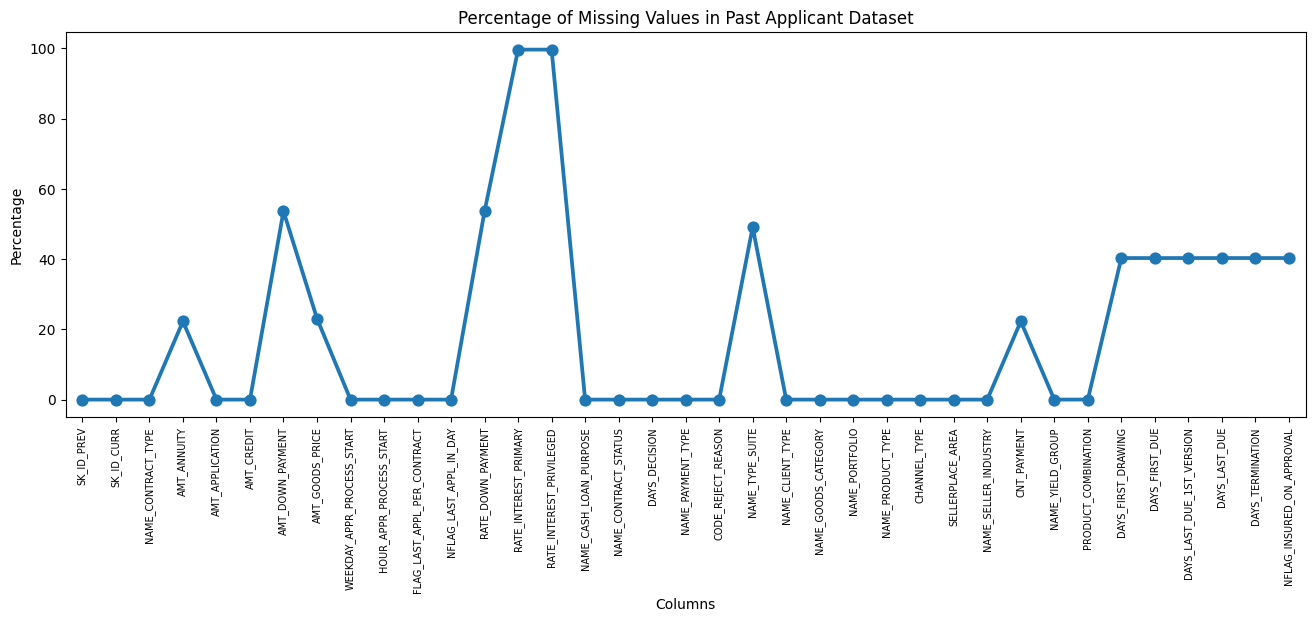

In [270]:
missing = pd.DataFrame((new_pa_df.isnull().sum()) * 100 / new_pa_df.shape[0]).reset_index()
missing.columns = ['Column', 'Percentage']

# Plotting using seaborn
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='Column', y='Percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values in Past Applicant Dataset")
plt.ylabel("Percentage")
plt.xlabel("Columns")
plt.show()

In [271]:
# Past Applicant Dataset
# Calculate Nan percent in each column
nan_percent_pa = (new_pa_df.isna().sum() / len(new_pa_df)) * 100


# Create a DataFrame from the series
nan_percent_pa_df = nan_percent_pa.reset_index()
nan_percent_pa_df.columns = ['Column', 'NaN_Percent']


# Sort the DataFrame by the percentage of NaNs in ascending order
nan_percent_df = nan_percent_pa_df.sort_values(by='NaN_Percent', ascending=False)


# Print the top variable with missing data in the variable. Because there is 14 variable with missing data therefore only the top 14 is display.
nan_percent_df.head(14)

Column  NaN_Percent
14   RATE_INTEREST_PRIVILEGED    99.643698
13      RATE_INTEREST_PRIMARY    99.643698
6            AMT_DOWN_PAYMENT    53.636480
12          RATE_DOWN_PAYMENT    53.636480
20            NAME_TYPE_SUITE    49.119754
36  NFLAG_INSURED_ON_APPROVAL    40.298129
35           DAYS_TERMINATION    40.298129
34              DAYS_LAST_DUE    40.298129
33  DAYS_LAST_DUE_1ST_VERSION    40.298129
32             DAYS_FIRST_DUE    40.298129
31         DAYS_FIRST_DRAWING    40.298129
7             AMT_GOODS_PRICE    23.081773
3                 AMT_ANNUITY    22.286665
28                CNT_PAYMENT    22.286366

**3.** Create two list which identify the variable with missing value in the dataset by data types

In [272]:
# Based on the missing value above, the index of the missing value is used
i = [6,12,20,36,35,34,33,32,31,7,3,28,30,5]


# Identify the column name
column_names = new_pa_df.columns[i]


# Identify the column dtype
column_dtypes = new_pa_df[column_names].dtypes


# Print out the column name & dtype
float_pa = []
object_pa = []
for index, dtype in zip(column_names, column_dtypes):
    if dtype == 'float64':
        float_pa.append(index)
    else:
        object_pa.append(index)

**4.1** Replace the object dtypes missing value with the mode  

In [273]:
# Object dtypes
# Replace the missing value with the mode value 
# List of object columns to fill NaN values with mode
object_columns_fill_pa = object_pa

# Iterate over each column and fill NaN with mode
for col in object_columns_fill_pa:
    mode_value_pa = new_pa_df[col].mode()[0]  # Calculate mode
    new_pa_df[col].fillna(mode_value_pa, inplace=True)  # Fill NaN with mode

C:\Users\Sam\AppData\Local\Temp\ipykernel_1184\187181369.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_pa_df[col].fillna(mode_value_pa, inplace=True)  # Fill NaN with mode


**4.2.** Replace the missing value for int & float dtypes with the mean

In [274]:
# Float dtypes
# Replace the missing value with the mean value
# List the column
float_columns_fill_pa = float_pa
# Iterate over and fill NaN with mean
new_pa_df[float_columns_fill_pa] = new_pa_df[float_columns_fill_pa].fillna(new_pa_df[float_columns_fill_pa].mean())

**5.** Removal of unnecessary column 

In [275]:
pa_df.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [276]:
# Create a list for variable to be remove
new_pa_df = new_pa_df.iloc[:, :21]
pa_columns_drop = ['NAME_TYPE_SUITE',
                   'NFLAG_LAST_APPL_IN_DAY',
                   'FLAG_LAST_APPL_PER_CONTRACT',
                   'HOUR_APPR_PROCESS_START',
                   'WEEKDAY_APPR_PROCESS_START',
                   'NAME_CASH_LOAN_PURPOSE',
                   'RATE_INTEREST_PRIMARY',
                   'RATE_INTEREST_PRIVILEGED',
                   'NAME_PAYMENT_TYPE']


new_pa_df.drop(columns=pa_columns_drop, inplace=True)

**6.** Checking for missing value after cleaning the data


In [277]:
# After handling missing value
# Calculate Nan percent in each column
nan_percent_pa = (new_pa_df.isna().sum().sum() / len(pa_df)) * 100


# Print the output
print(f'After handling all the missing value, there is {nan_percent_pa}% of missing value within the dataset.')

After handling all the missing value, there is 0.0% of missing value within the dataset.


**7.** Exploring the data

In [278]:
# Identify the variable name in past applicant dataset
for index,column in enumerate(new_pa_df.columns.values):
    print(f'{index}:{column}')

0:SK_ID_PREV
1:SK_ID_CURR
2:NAME_CONTRACT_TYPE
3:AMT_ANNUITY
4:AMT_APPLICATION
5:AMT_CREDIT
6:AMT_DOWN_PAYMENT
7:AMT_GOODS_PRICE
8:RATE_DOWN_PAYMENT
9:NAME_CONTRACT_STATUS
10:DAYS_DECISION
11:CODE_REJECT_REASON


In [279]:
# Identify the data type name in past applicant dataset
new_pa_df.dtypes

SK_ID_PREV                int64
SK_ID_CURR                int64
NAME_CONTRACT_TYPE       object
AMT_ANNUITY             float64
AMT_APPLICATION         float64
AMT_CREDIT              float64
AMT_DOWN_PAYMENT        float64
AMT_GOODS_PRICE         float64
RATE_DOWN_PAYMENT       float64
NAME_CONTRACT_STATUS     object
DAYS_DECISION             int64
CODE_REJECT_REASON       object
dtype: object

In [280]:
new_pa_df.head(5)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  RATE_DOWN_PAYMENT  \
0     17145.0          0.000000          17145.0           0.000000   
1    679671.0       6697.402139         607500.0           0.079637   
2    136444.5       6697.402139         112500.0           0.079637   
3    470790.0       6697.402139         450000.0           0.079637   
4    404055.0       6697.402139         337500.0           0.079637   

  NAME_CONTRACT_STATUS  DAYS_DECISION CODE_REJECT_REASON  
0             Approved            -73                XAP  
1             Approved           -164                XAP  
2             Approved           -301                XAP  
3             Approved           -512                XAP  
4              Refused           -781                 HC

### Applicant Data

**1.** Create a copy of the df for data manipulation

In [281]:
# Create a new df for applicant data
new_ad_df = ad_df.copy()

**2.** Identify the missing value within the dataset

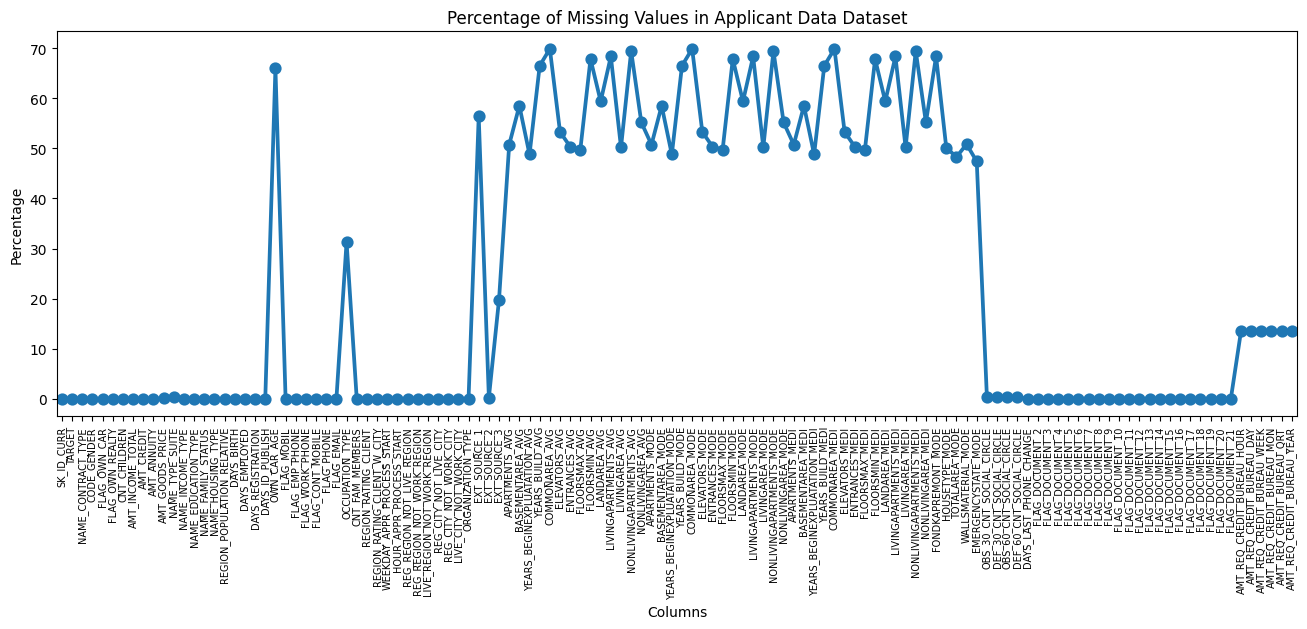

In [282]:
missing = pd.DataFrame((new_ad_df.isnull().sum()) * 100 / new_ad_df.shape[0]).reset_index()
missing.columns = ['Column', 'Percentage']

# Plotting using seaborn
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='Column', y='Percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values in Applicant Data Dataset")
plt.ylabel("Percentage")
plt.xlabel("Columns")
plt.show()

In [283]:
# Applicant Data Dataset
# calculate Nan percent in each column
nan_percent_ad = (new_ad_df.isna().sum() / len(new_ad_df)) * 100

# Create a DataFrame from the series
nan_percent_ad_df = nan_percent_ad.reset_index()
nan_percent_ad_df.columns = ['Column', 'NaN_Percent']

# Sort the DataFrame by the percentage of NaNs in ascending order
nan_percent_ad_df = nan_percent_ad_df.sort_values(by='NaN_Percent', ascending=False)

nan_percent_ad_df.head(10)

Column  NaN_Percent
76           COMMONAREA_MEDI    69.872297
48            COMMONAREA_AVG    69.872297
62           COMMONAREA_MODE    69.872297
70  NONLIVINGAPARTMENTS_MODE    69.432963
56   NONLIVINGAPARTMENTS_AVG    69.432963
84  NONLIVINGAPARTMENTS_MEDI    69.432963
86        FONDKAPREMONT_MODE    68.386172
68     LIVINGAPARTMENTS_MODE    68.354953
54      LIVINGAPARTMENTS_AVG    68.354953
82     LIVINGAPARTMENTS_MEDI    68.354953

**3.** Create two list which identify the variable with missing value in the dataset by data types

In [284]:
# Based on the missing value above, the index of the missing value is used
i = [76,48,62,70,56,84,86,68,54,82,52,66,80,75,61,47,21,81,67,53,73,45,59,41,71,57,
     85,77,49,63,89,72,44,58,78,50,64,55,69,83,87,65,79,51,60,74,46,88,90,28,43,116,
     117,118,119,120,11,91,92,121,93,94,42,10,9,29,95]


# Identify the column name
column_names = new_ad_df.columns[i]


# Identify the column dtype
column_dtypes = new_ad_df[column_names].dtypes


# Print out the column name & dtype
float_ad = []
object_ad = []
for index, dtype in zip(column_names, column_dtypes):
    if dtype == 'float64':
        float_ad.append(index)
    else:
        object_ad.append(index)


**4.1** Replace the object dtypes missing value with the mode  

In [285]:
# Object dtypes
# Replace the missing value with the mode value 
# List of object columns to fill NaN values with mode
object_columns_fill_ad = object_ad

# Iterate over each column and fill NaN with mode
for col in object_columns_fill_ad:
    mode_value_ad = new_ad_df[col].mode()[0]  # Calculate mode
    new_ad_df[col].fillna(mode_value_ad, inplace=True)  # Fill NaN with mode

C:\Users\Sam\AppData\Local\Temp\ipykernel_1184\493636524.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_ad_df[col].fillna(mode_value_ad, inplace=True)  # Fill NaN with mode


**4.2.** Replace the missing value for int & float dtypes with the mean

In [286]:
# Float dtypes
# Replace the missing value with the mean value
# List the column
float_columns_fill_ad = float_ad
# Iterate over and fill NaN with mean
new_ad_df[float_columns_fill_ad] = new_ad_df[float_columns_fill_ad].fillna(new_ad_df[float_columns_fill_ad].mean())

**5.** Checking for missing value after cleaning the data

In [287]:
# After handling missing value
# Calculate Nan percent in each column
nan_percent_ad = (new_ad_df.isna().sum().sum() / len(new_ad_df)) * 100


# Print the output
print(f'After handling all the missing value, there is {nan_percent_ad}% of missing value within the dataset.')

After handling all the missing value, there is 0.0% of missing value within the dataset.


**6.** Data Transformation

In [288]:
new_ad_df = new_ad_df.iloc[:, :20]

In [289]:
# This variable were transform to make it more readible
new_ad_df['Age'] = (new_ad_df['DAYS_BIRTH']/365).abs().round()
new_ad_df['Years_Employed'] = (new_ad_df['DAYS_EMPLOYED']/365).abs().round()

In [290]:
new_ad_df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
Age                           float64
Years_Employed                float64
dtype: object

**7.** Removal of unnecessary column 

In [291]:
# Removal of unnecessary column
new_ad_df = new_ad_df.drop(columns='NAME_TYPE_SUITE')
new_ad_df = new_ad_df.drop(columns='DAYS_REGISTRATION')
new_ad_df = new_ad_df.drop(columns='DAYS_BIRTH')
new_ad_df = new_ad_df.drop(columns='DAYS_EMPLOYED')

In [292]:
# Filter the outlier from the data
filter_ad_df = new_ad_df[new_ad_df['Years_Employed']<80]

**8.** Exploring the data

*8.1*. Column in the dataset

In [293]:
# Identify the variable name in applicant data dataset
for index,column in enumerate(new_ad_df.columns.values):
    print(f'{index}:{column}')

0:SK_ID_CURR
1:TARGET
2:NAME_CONTRACT_TYPE
3:CODE_GENDER
4:FLAG_OWN_CAR
5:FLAG_OWN_REALTY
6:CNT_CHILDREN
7:AMT_INCOME_TOTAL
8:AMT_CREDIT
9:AMT_ANNUITY
10:AMT_GOODS_PRICE
11:NAME_INCOME_TYPE
12:NAME_EDUCATION_TYPE
13:NAME_FAMILY_STATUS
14:NAME_HOUSING_TYPE
15:REGION_POPULATION_RELATIVE
16:Age
17:Years_Employed


*8.2.* Data type

In [294]:
# Identify the data type name in applicant data dataset
new_ad_df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
Age                           float64
Years_Employed                float64
dtype: object

*8.3.* Target variable count

In [295]:
# Count of the target variable
new_ad_df['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [296]:
# Calculate the target variable in percentage
target_percentages = (ad_df['TARGET'].value_counts() / len(ad_df) * 100).round(2)
print(target_percentages)

TARGET
0    91.93
1     8.07
Name: count, dtype: float64


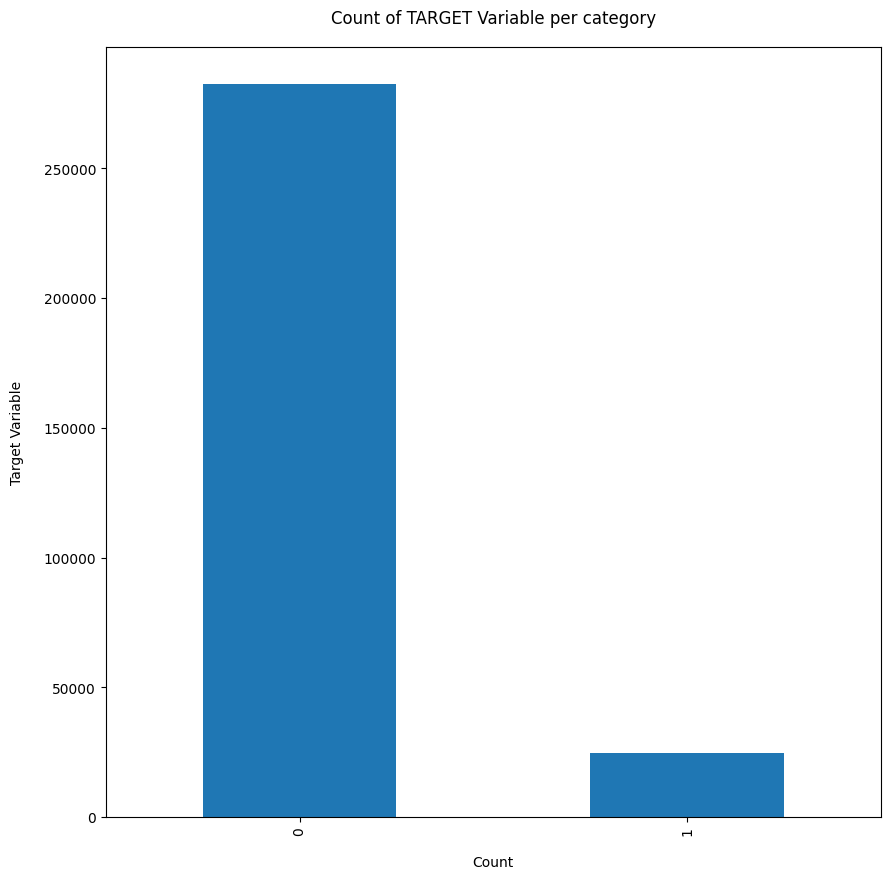

In [297]:
# Plot the variable in a horizontal bar chart to illustrate the imbalance data
ad_df['TARGET'].value_counts().plot(kind='bar', figsize=(10, 10))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

The target variable is highly imbalance as 92% of the target had diffifucly paying while 8% of represent the other cases.

## Merging the dataset

In [298]:
merged_df = pd.merge(filter_ad_df, new_pa_df, how='left')
merged_df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
252178      456248       0         Cash loans           F            N   
252179      456251       0         Cash loans           M            N   
252180      456253       0         Cash loans           F            N   
252181      456254       1         Cash loans           F            N   
252182      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
252178               Y             0          153000.0    331920.0   
252179               N             0          157500.0    254700.0   
252180               Y             0          153000.0    677664.0   
252181               Y             0          171000.0    370107.0   
252182               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  REGION_POPULATION_RELATIVE   Age Years_Employed  \
0           24700.5  ...                    0.018801  26.0            2.0   
1           35698.5  ...                    0.003541  46.0            3.0   
2            6750.0  ...                    0.010032  52.0            1.0   
3           29686.5  ...                    0.008019  52.0            8.0   
4           21865.5  ...                    0.028663  55.0            8.0   
...             ...  ...                         ...   ...            ...   
252178      16096.5  ...                    0.022625  46.0           20.0   
252179      27558.0  ...                    0.032561  26.0            1.0   
252180      29979.0  ...                    0.005002  41.0           22.0   
252181      20205.0  ...                    0.005313  33.0           13.0   
252182      49117.5  ...                    0.046220  46.0            3.0   

       SK_ID_PREV AMT_APPLICATION  AMT_DOWN_PAYMENT  RATE_DOWN_PAYMENT  \
0             NaN             NaN               NaN                NaN   
1             NaN             NaN               NaN                NaN   
2             NaN             NaN               NaN                NaN   
3             NaN             NaN               NaN                NaN   
4             NaN             NaN               NaN                NaN   
...           ...             ...               ...                ...   
252178        NaN             NaN               NaN                NaN   
252179        NaN             NaN               NaN                NaN   
252180        NaN             NaN               NaN                NaN   
252181        NaN             NaN               NaN                NaN   
252182        NaN             NaN               NaN                NaN   

        NAME_CONTRACT_STATUS  DAYS_DECISION  CODE_REJECT_REASON  
0                        NaN            NaN                 NaN  
1                        NaN            NaN                 NaN  
2                        NaN            NaN                 NaN  
3                        NaN            NaN                 NaN  
4                        NaN            NaN                 NaN  
...                      ...            ...                 ...  
25

****
# Exploratory Data Analysis (EDA)

## Univariate Analysis

Data Exploration

**1.** Plot distibution of individual predictors by contract type

**1.1.** Past Applicant Dataset

In [299]:
new_pa_df.NAME_CONTRACT_STATUS.value_counts()/len(new_pa_df)*100

NAME_CONTRACT_STATUS
Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: count, dtype: float64

**Loan Type Insight**

1. Based on the image above, consumer loan have the highest total count when compared to the other loan category. Within the consumer loan contract status, majority of the loan was approved with over 60,000 count. In addition, it could be seen that consumer loan also carried the highest unused offer compared to the other categories.

2. Cash loan had the highest cancel count at 268,591 among the categories. It signify that it was significantly difficult for cash loan to be approve. In addition, with the refusal rate for cash loan would be would be the highest compared to the other category. Although it is not explicit mentioned, further research could be conducted to explore the reason that the customer refuse to take the cash loan.

**Rejection Type Insight**

1. Based on the reject reason bar graph, it could be seen most of the loan cancel by the institution lies within the code XAP.

2. Applicant which refuse the loan was under several code which were: HC, LIMIT, SCOFR & SCO.

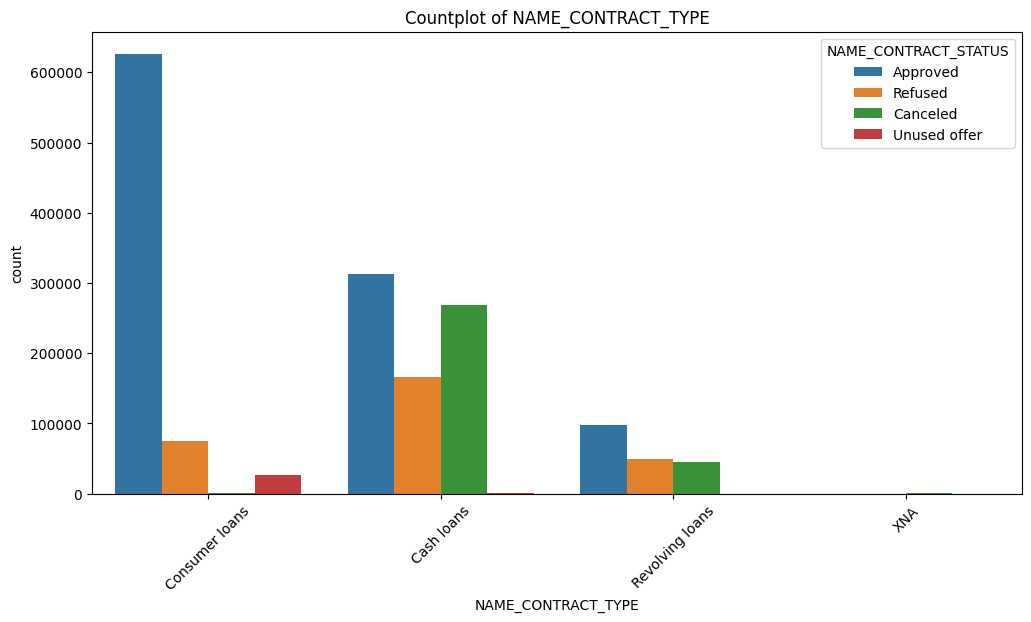

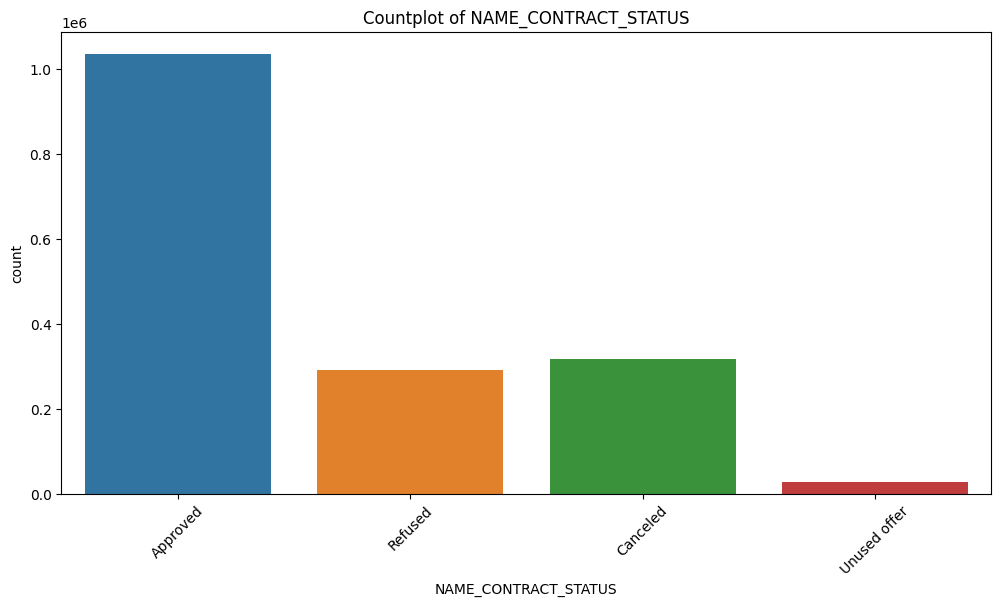

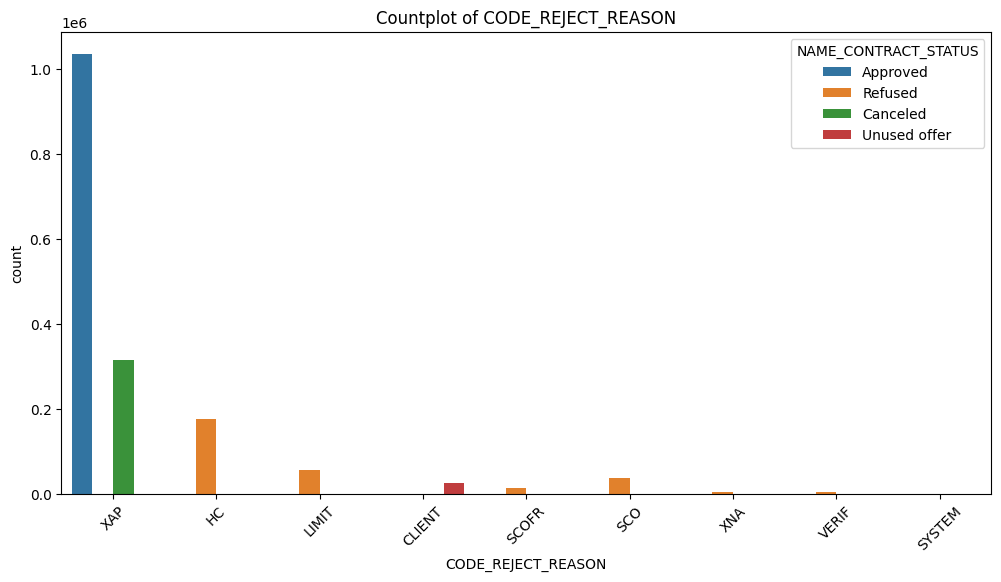

In [300]:
predictors = new_pa_df.drop(columns=['SK_ID_PREV',
                                        'SK_ID_CURR',
                                        'AMT_ANNUITY',
                                        'AMT_APPLICATION',
                                        'AMT_CREDIT',
                                        'AMT_DOWN_PAYMENT',
                                        'AMT_GOODS_PRICE',
                                        'RATE_DOWN_PAYMENT',
                                        'DAYS_DECISION'])

# Loop through each predictor and create a countplot
for i, predictor in enumerate(predictors.columns):
    plt.figure(figsize=(12, 6))  # Set figure size (width=12 inches, height=6 inches)
    sns.countplot(data=new_pa_df, x=predictor, hue='NAME_CONTRACT_STATUS')
    plt.title(f'Countplot of {predictor}')
    plt.xticks(rotation=45)  # Rotate x-axis labels if they are long
    plt.show()

**1.2.** Applicant Data  Dataset

In [301]:
new_ad_df.TARGET.value_counts()/len(new_ad_df)*100

TARGET
0    91.927118
1     8.072882
Name: count, dtype: float64

In [302]:
new_ad_df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE      NAME_INCOME_TYPE  \
0           24700.5         351000.0               Working   
1           35698.5        1129500.0         State servant   
2            6750.0         135000.0               Working   
3           29686.5         297000.0               Working   
4           21865.5         513000.0               Working   
...             ...              ...                   ...   
307506      27558.0         225000.0               Working   
307507      12001.5         225000.0             Pensioner   
307508      29979.0         585000.0               Working   
307509      20205.0         319500.0  Commercial associate   
307510      49117.5         675000.0  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE   Age  Years_Employed  
0       House / apartment                    0.018801  26.0             2.0  
1       House / apartment                    0.003541  46.0             3.0  
2       House / apartment                    0.010032  52.0             1.0  
3       House / apartment                    0.008019  52.0             8.0  
4       House / apartment                    0.028663  55.0             8.0  
...                   ...                         ...   ...             ...  
307506       With parents                    0.032561  26.0             1.0  
307507  House / apartment                    0.025164  57.0          1001.0  
307508  House / apartment                    0.005002  41.0            22.

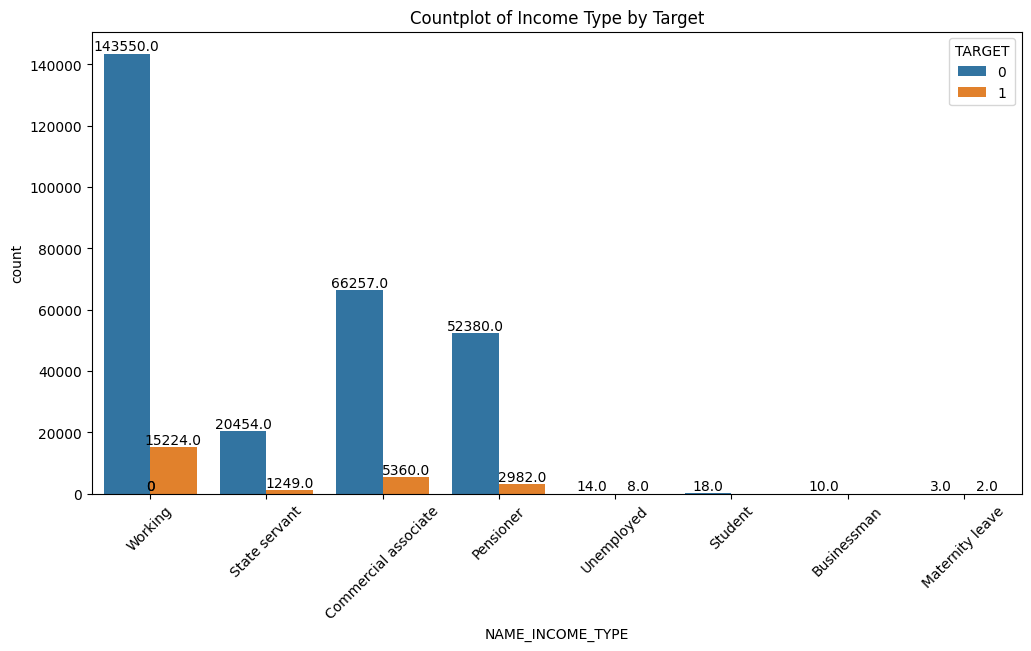

In [303]:
plt.figure(figsize=(12, 6))  # Set figure size (width=12 inches, height=6 inches)
ax = sns.countplot(data=new_ad_df, x='NAME_INCOME_TYPE', hue='TARGET')

# Add counts on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Countplot of Income Type by Target')
plt.xticks(rotation=45)  # Rotate x-axis labels if they are long
plt.show()

**Gender Insight**

1. It could be inferred that female had the highest count for applying the loan. It has double the amount of count in term of loan application.

2. In term of having difficulty replaying the loan, there is any significant difference because there was only a differences of 3,515 count. With that being said, female applicant had a higher probability of replaying the loan compared to male because only 7.5% of female have difficulty replaying while 11.3% of male applicant have difficulty reaplying the loan.

**Car Insight**

1. Applicant without car were more likely to experiences difficulty repaying the loan as 9.3% of the applicant were highlighted as 0. Whereas, applicant which had car had a lower percentage of applicant repaying the loan (7.8%).

**Realty Insight**

1. Applicant which had a house/flat were more likely to not have difficulty repaying the loan while applicant which does not have a house/flat had a higher difficulty in repaying the loan. The respective ratio for having difficulty repaying the loan was 8.65% and 9.08%. 

**Children Insight**

1. Based on the bar chart, it can be seen that applicant without children had the highest applicant. Only 8.35% of applicant had problem with repaying the loan.

2. Among the applicant with children, applicant with 1 or 2 children were ranked the second and third highest applicant for the loan. Respectively, 9.80% and 9.60% of applicant with 1 or 2 kids had issue with paying the loan.

3. An elbow curve could be seen as there was a significant drop in term of applicant count when children were involved. Moreover, there was minimal applicant with more than 3 children. It could be inferred that greater the number of children within a family, the less likelyhood that the applicant would be applying for any form of loan.

**Income Type Insight**

1. It could be seen that majority of the applicant revolve around four category for type of income and the percentage of applicant which struggle to repay the debt are shown below: 

2. Applicant which were working had the highest % of repaying the debt especially within the working type. Based on these, it could be inferred that disposable income within that category could be lower than expected therefore may experiences delay in repaying the loan.

3. On the other hand, pensioner had the lowest % in term of difficulty in repaying debt. It could be inferred that the accumulated wealth throughout the entire career could potentially assist with servicing the loan on a timely manner.

**Family Status Insight**

1. It could be seen that civil marriage had the highest % in term of repaying back the debt which 11.04% of the applicant struggling.

2. Married applicant had the lowest at 8.2%. In addition, married applicant had the highest count of total applicant. 


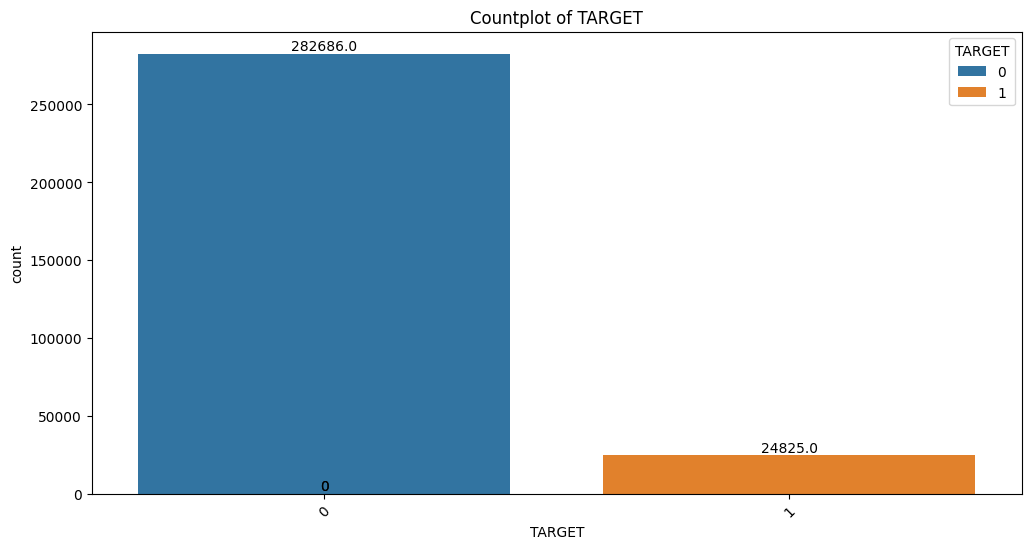

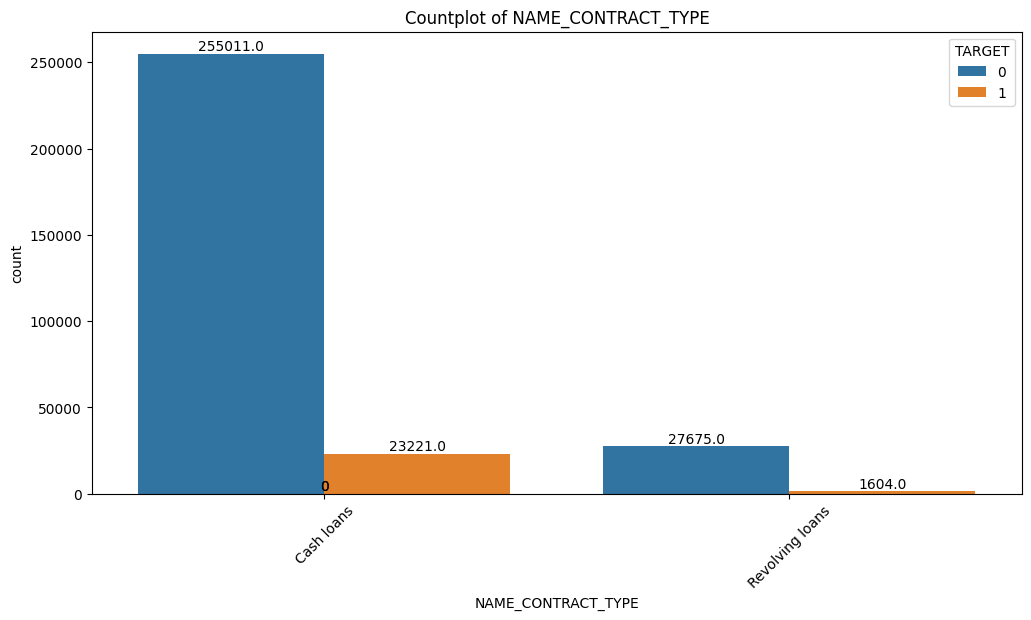

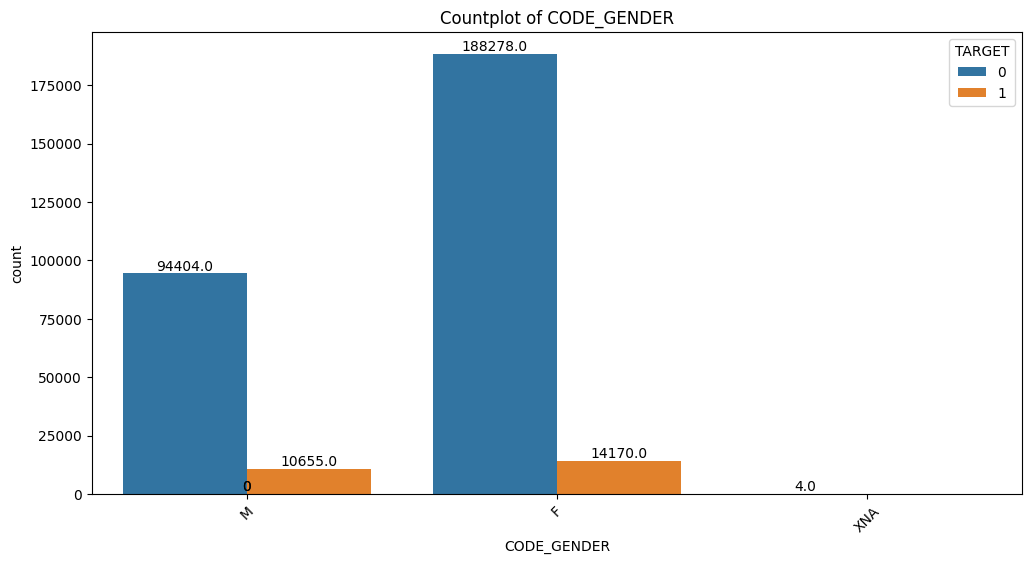

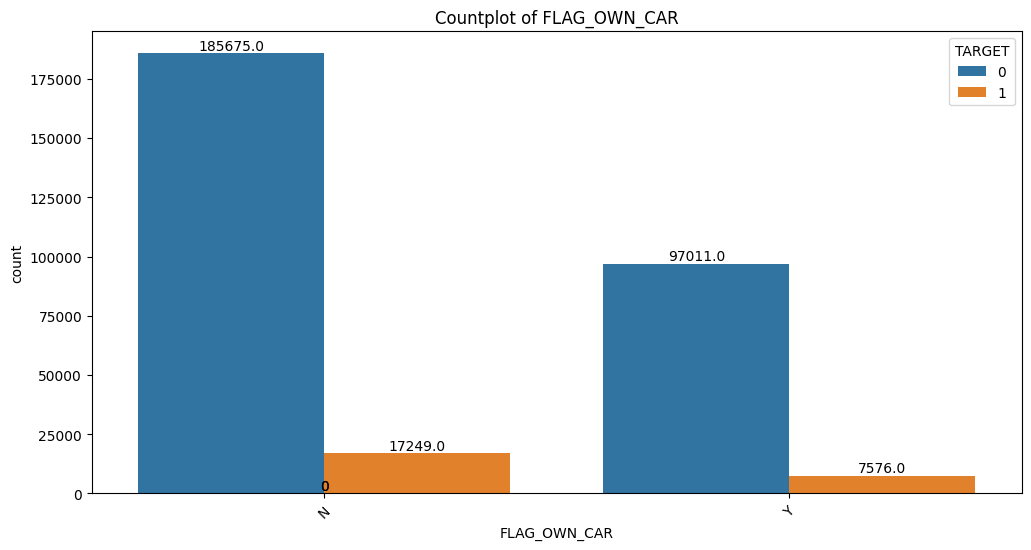

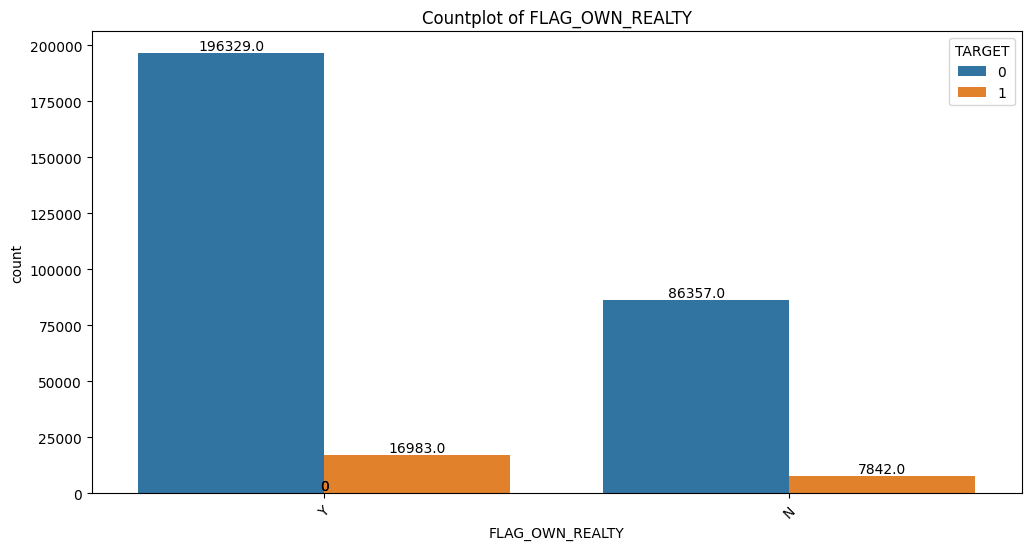

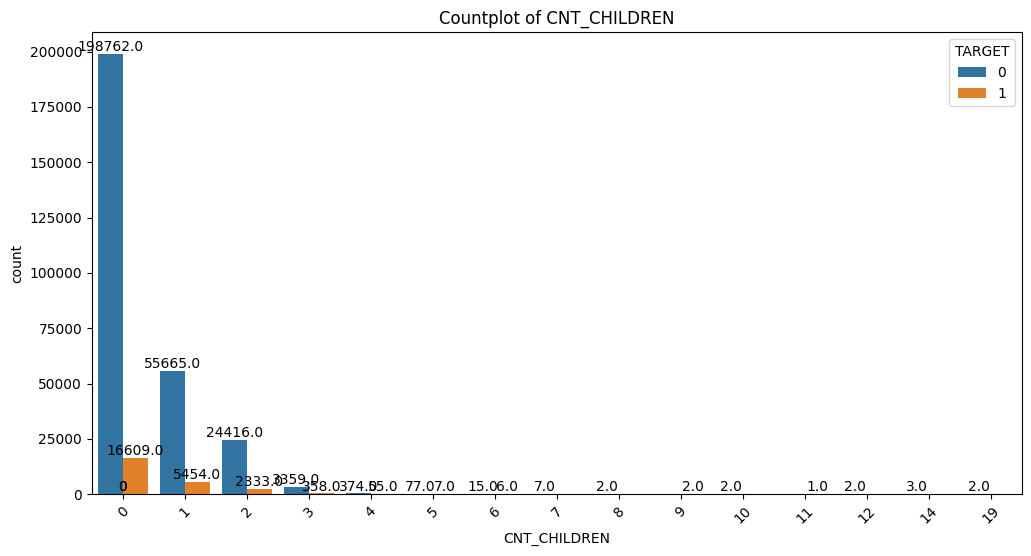

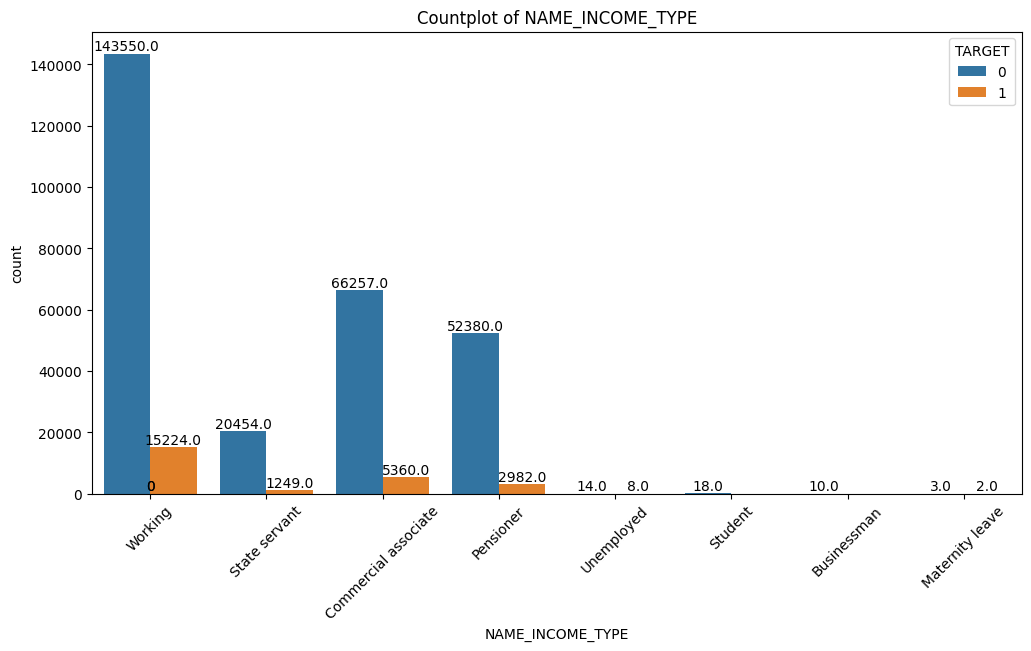

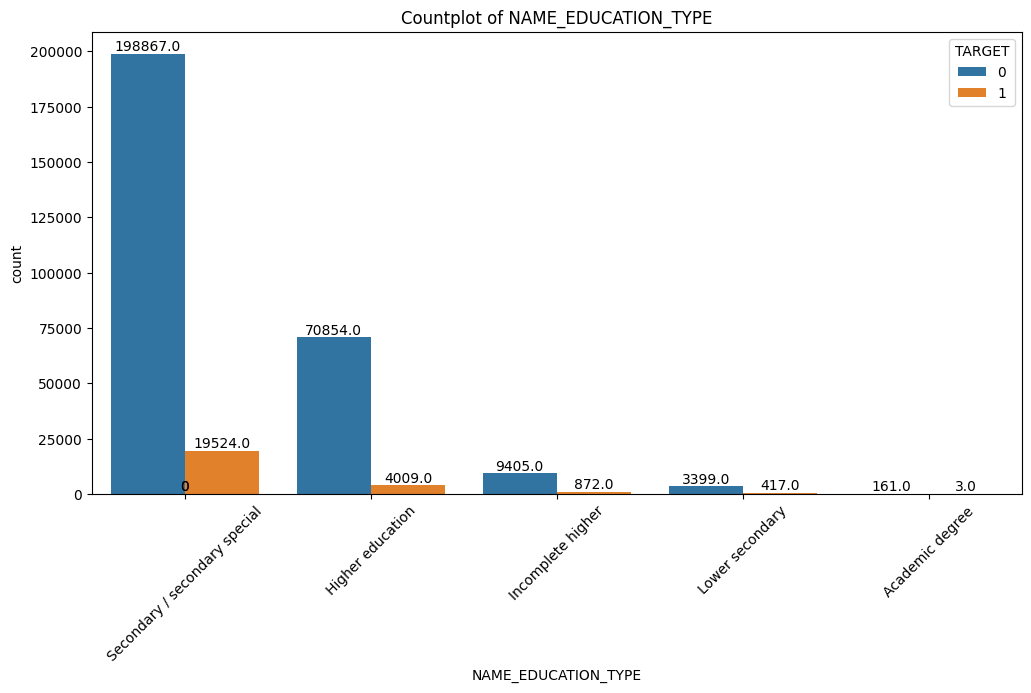

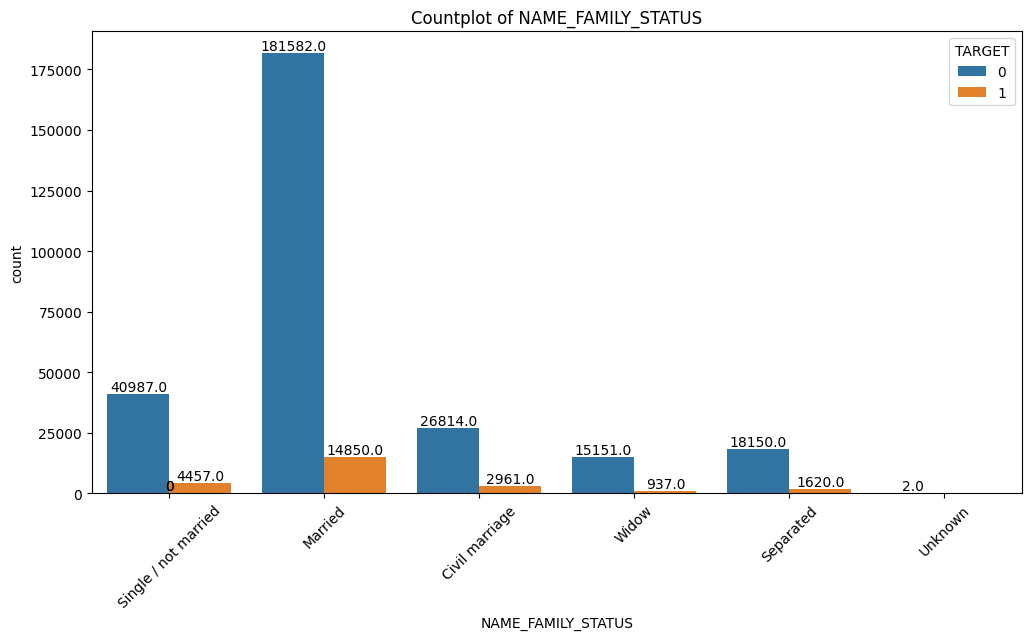

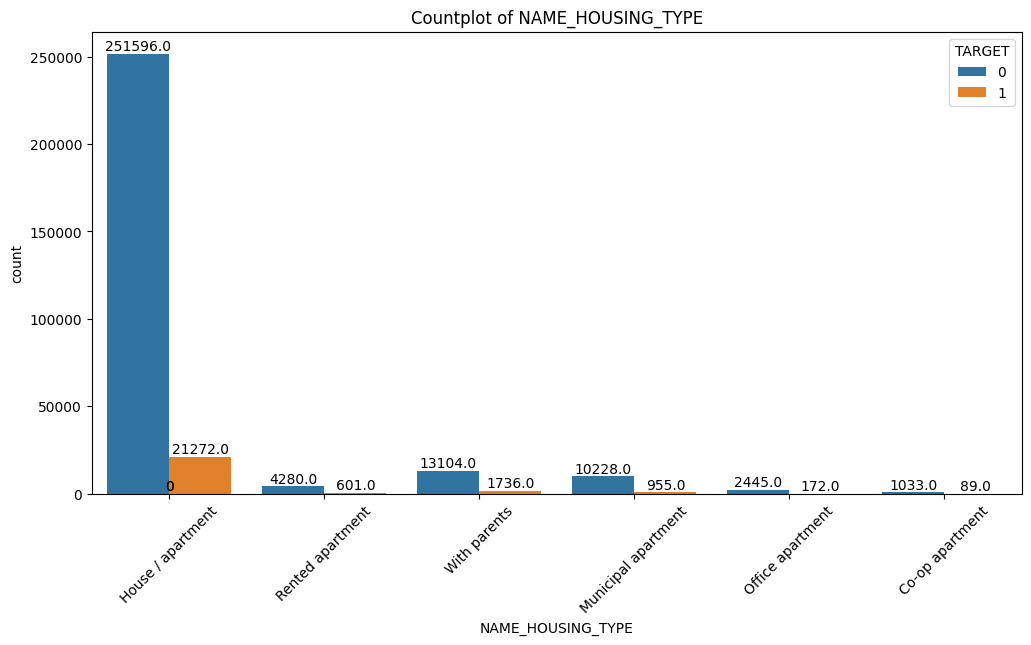

In [304]:
predictors = filter_ad_df.drop(columns=[
    'SK_ID_CURR',
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'REGION_POPULATION_RELATIVE',
    'Age',
    'Years_Employed',
    'AMT_GOODS_PRICE'
])

# Loop through each predictor and create a countplot
for i, predictor in enumerate(predictors.columns):
    plt.figure(figsize=(12, 6))  # Set figure size (width=12 inches, height=6 inches)
    ax = sns.countplot(data=new_ad_df, x=predictor, hue='TARGET')
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.title(f'Countplot of {predictor}')
    plt.xticks(rotation=45)  # Rotate x-axis labels if they are long
    plt.show()

**Distribution of Age**

1. This histogram below exhibit the distribution of the applicant age in a histogram format.

Text(0.5, 1.0, 'Distribution of Age')

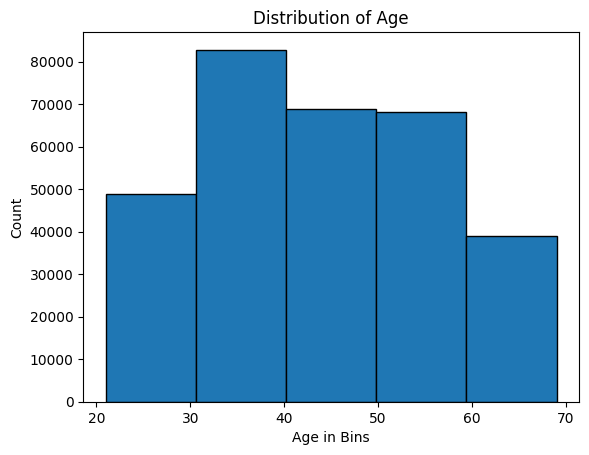

In [305]:
# Histogram of Age
plt.hist(new_ad_df['Age'], bins=5,edgecolor='k')
plt.xlabel('Age in Bins')
plt.ylabel('Count')
plt.title('Distribution of Age')

**Distribution of Age with KDE**

1. By using the `stats` library, the kurtosis and skewness could be measured.

2. The distribution is had a Skewness of 0.12 and a Kurtosis of -1.05. Therefore,  the distribution is slightly skew positively and has lower kurtosis than a normal distributtion. 

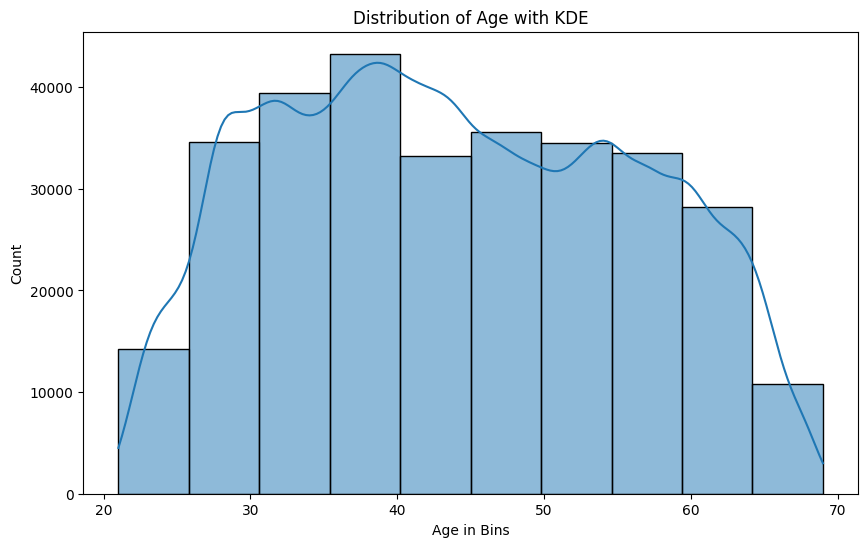

Skewness of Age: 0.12
Kurtosis of Age: -1.05


In [306]:
plt.figure(figsize=(10, 6))
sns.histplot(new_ad_df['Age'], bins=10, kde=True, edgecolor='k')  # Use sns.histplot with kde=True to include KDE
plt.xlabel('Age in Bins')
plt.ylabel('Count')
plt.title('Distribution of Age with KDE')
plt.show()

age_kurtosis = kurtosis(new_ad_df['Age']).round(2)
skewness_age = stats.skew(new_ad_df['Age']).round(2)


print(f'Skewness of Age: {skewness_age}')
print(f'Kurtosis of Age: {age_kurtosis}')

**Anomaly Detected**

It could be identify that there are several outliers within the data. 

The variable DAYS_EMPLOYED were divided by 365 to obtain the years of working in employment.

It could be seen that there is a bin which consist of 800 - 100 years of service therefore there is an error and require the removal of these data points.

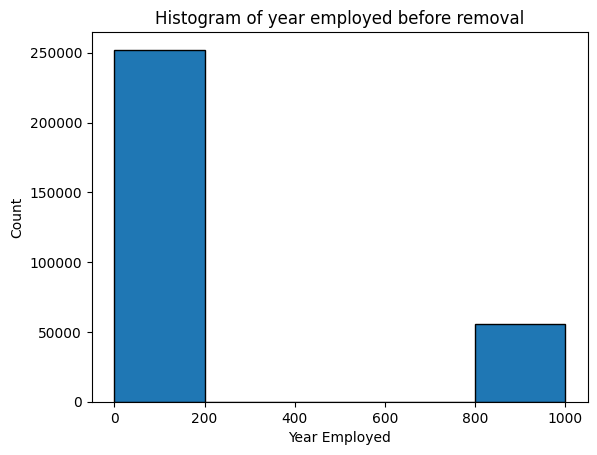

In [307]:
# Histogram of people work since employment before removal of outlier
plt.hist(new_ad_df['Years_Employed'], bins=5, edgecolor='k')
plt.xlabel('Year Employed')
plt.ylabel('Count')
plt.title('Histogram of year employed before removal')
plt.show()

**Distribution of being Employent Duaration**

1. This histogram below exhibit the distribution of the applicant employment duration in a histogram format.

(array([1.25732e+05, 7.09950e+04, 2.96730e+04, 1.22650e+04, 6.75900e+03,
        3.45000e+03, 2.04800e+03, 9.31000e+02, 2.43000e+02, 4.10000e+01]),
 array([ 0. ,  4.9,  9.8, 14.7, 19.6, 24.5, 29.4, 34.3, 39.2, 44.1, 49. ]),
 <BarContainer object of 10 artists>)

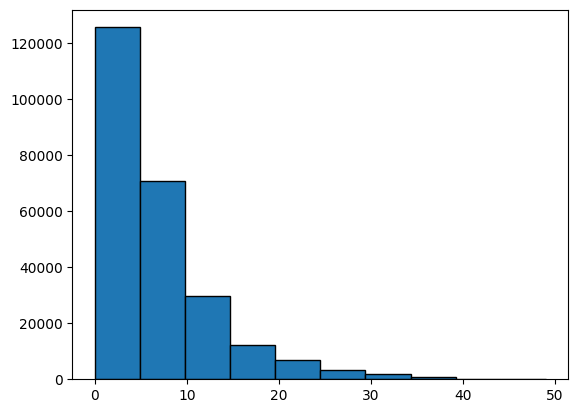

In [308]:
# Histogram of people work since employment after removal of outlier
plt.hist(filter_ad_df['Years_Employed'], bins=10, edgecolor='k')

**Distribution of Age with KDE**

1. By using the `stats` library, the kurtosis and skewness could be measured.

2. The distribution is had a Skewness of 1.96 and a Kurtosis of 1.72.

3. It is positively skew and there is greater variation since the kurtosis is 1.72 in employment years and could potentially also have more outliers.

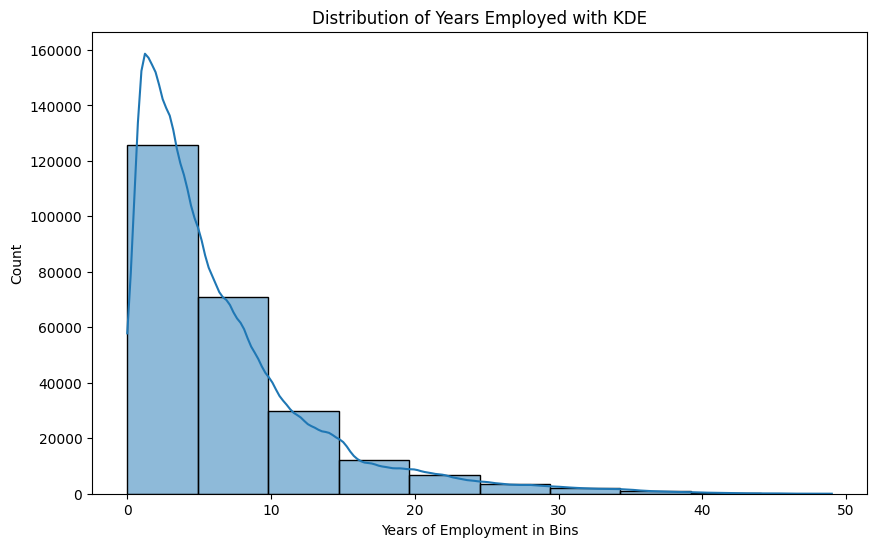

Skewness of Years Employed: 1.96
Kurtosis of Years Employed: 4.72


In [309]:
plt.figure(figsize=(10, 6))
sns.histplot(filter_ad_df['Years_Employed'], bins=10, kde=True, edgecolor='k')  # Use sns.histplot with kde=True to include KDE
plt.xlabel('Years of Employment in Bins')
plt.ylabel('Count')
plt.title('Distribution of Years Employed with KDE')
plt.show()

ye_kurtosis = kurtosis(filter_ad_df['Years_Employed']).round(2)
ye_skewness = stats.skew(filter_ad_df['Years_Employed']).round(2)


print(f'Skewness of Years Employed: {ye_skewness}')
print(f'Kurtosis of Years Employed: {ye_kurtosis}')

In [310]:
def plot_target_histograms(df, numerical_column, target_column='TARGET'):

    df[numerical_column] = df[numerical_column].astype('float32')

    # Split the data into two groups based on the target column
    target_0 = df[df[target_column] == 0]
    target_1 = df[df[target_column] == 1]

    # Set up the matplotlib figure
    plt.figure(figsize=(14, 10))

    # Plot histogram for target = 0
    plt.figure(figsize=(10,3))
    sns.histplot(target_0[numerical_column],kde=True, color='blue', alpha=0.5, label=f'{target_column} = 0')
    
    # Plot histogram for target = 1
    sns.histplot(target_1[numerical_column],kde=True, color='red', alpha=0.5 ,label=f'{target_column} = 1')
    
    plt.title(f'Histogram of {numerical_column}')
    plt.xlabel(numerical_column)
    plt.ylabel('Frequency')
    
    plt.legend()
    plt.show()

**Distribution of Loan amount by TARGET**

1. The distribution is positvely skew and have a higher kurtosis than a normal distribution. 

2. Transformation could be conducted in future analysis.

C:\Users\Sam\AppData\Local\Temp\ipykernel_1184\752738556.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_column] = df[numerical_column].astype('float32')


<Figure size 1400x1000 with 0 Axes>

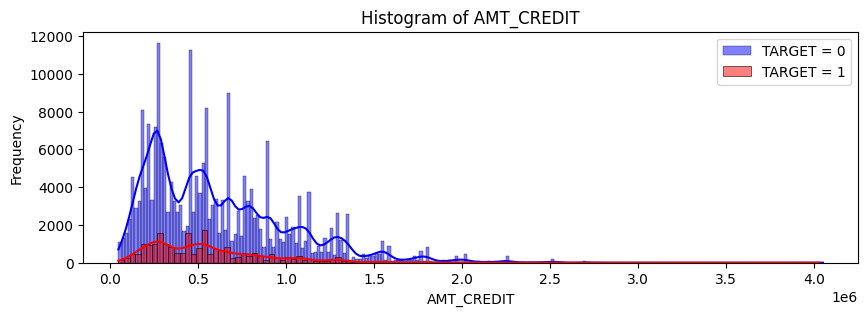

Skewness of Loan amount 0: 1.2
Kurtosis of Loan amount 0: 1.82
Skewness of Loan amount 1: 1.36
Kurtosis of Loan amount 1: 2.91


In [311]:
# Distribtion of AMT_CREDIT
plot_target_histograms(filter_ad_df, "AMT_CREDIT")

no_issue = filter_ad_df[filter_ad_df['TARGET']==0]
issue = filter_ad_df[filter_ad_df['TARGET']==1]


LoanAMT_kurtosis0 = kurtosis(no_issue['AMT_CREDIT']).round(2)
LoanAMT_skewness0 = stats.skew(no_issue['AMT_CREDIT']).round(2)
LoanAMT_kurtosis1 = kurtosis(issue['AMT_CREDIT']).round(2)
LoanAMT_skewness1 = stats.skew(issue['AMT_CREDIT']).round(2)


print(f'Skewness of Loan amount 0: {LoanAMT_skewness0}')
print(f'Kurtosis of Loan amount 0: {LoanAMT_kurtosis0}')
print(f'Skewness of Loan amount 1: {LoanAMT_skewness1}')
print(f'Kurtosis of Loan amount 1: {LoanAMT_kurtosis1}')

**Distribution of Goods amount by TARGET**

1. Looks very similiar to the above distribution.

C:\Users\Sam\AppData\Local\Temp\ipykernel_1184\752738556.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_column] = df[numerical_column].astype('float32')


<Figure size 1400x1000 with 0 Axes>

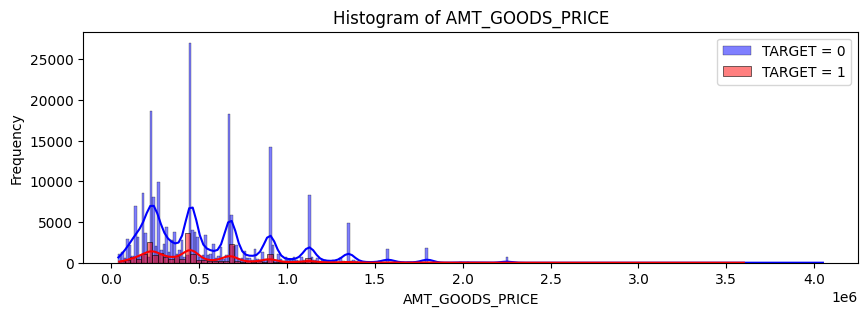

In [312]:
plot_target_histograms(filter_ad_df, "AMT_GOODS_PRICE")

In [313]:
filter_ad_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  252137.000000  252137.000000  252137.000000      2.521370e+05   
mean   278114.643103       0.086600       0.498515      1.759141e+05   
std    102815.635309       0.281248       0.763161      2.588516e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189035.000000       0.000000       0.000000      1.125000e+05   
50%    278064.000000       0.000000       0.000000      1.575000e+05   
75%    367165.000000       0.000000       1.000000      2.115000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  2.521370e+05  252137.000000     2.521370e+05   
mean   6.113984e+05   27812.291674     5.493946e+05   
std    4.065272e+05   14647.411336     3.730792e+05   
min    4.500000e+04    1980.000000     4.050000e+04   
25%    2.779695e+05   17073.000000     2.475000e+05   
50%    5.212800e+05   25834.500000     4.500000e+05   
75%    8.292240e+05   35617.500000     6.930000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE           Age  Years_Employed  
count               252137.000000  252137.00000   252137.000000  
mean                     0.020894      40.46441        6.532695  
std                      0.013874      10.04359        6.411589  
min                      0.000290      21.00000        0.000000  
25%                      0.010006      32.00000        2.000000  
50%                      0.018850      40.00000        5.000000  
75%                      0.028663      48.00000        9.000000  
max                      0.072508      69.00000       49.000000

**2.** Numerical Analysis

In [314]:
filter_ad_df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307504      456248       0         Cash loans           F            N   
307506      456251       0         Cash loans           M            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307504               Y             0          153000.0    331920.0   
307506               N             0          157500.0    254700.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE      NAME_INCOME_TYPE  \
0           24700.5         351000.0               Working   
1           35698.5        1129500.0         State servant   
2            6750.0         135000.0               Working   
3           29686.5         297000.0               Working   
4           21865.5         513000.0               Working   
...             ...              ...                   ...   
307504      16096.5         225000.0               Working   
307506      27558.0         225000.0               Working   
307508      29979.0         585000.0               Working   
307509      20205.0         319500.0  Commercial associate   
307510      49117.5         675000.0  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307504  Secondary / secondary special             Separated   
307506  Secondary / secondary special             Separated   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE   Age  Years_Employed  
0       House / apartment                    0.018801  26.0             2.0  
1       House / apartment                    0.003541  46.0             3.0  
2       House / apartment                    0.010032  52.0             1.0  
3       House / apartment                    0.008019  52.0             8.0  
4       House / apartment                    0.028663  55.0             8.0  
...                   ...                         ...   ...             ...  
307504  House / apartment                    0.022625  46.0            20.0  
307506       With parents                    0.032561  26.0             1.0  
307508  House / apartment                    0.005002  41.0            22.

In [315]:
new_pa_df.NAME_CONTRACT_STATUS.value_counts()

NAME_CONTRACT_STATUS
Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: count, dtype: int64

In [316]:
filter_ad_df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307504      456248       0         Cash loans           F            N   
307506      456251       0         Cash loans           M            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307504               Y             0          153000.0    331920.0   
307506               N             0          157500.0    254700.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE      NAME_INCOME_TYPE  \
0           24700.5         351000.0               Working   
1           35698.5        1129500.0         State servant   
2            6750.0         135000.0               Working   
3           29686.5         297000.0               Working   
4           21865.5         513000.0               Working   
...             ...              ...                   ...   
307504      16096.5         225000.0               Working   
307506      27558.0         225000.0               Working   
307508      29979.0         585000.0               Working   
307509      20205.0         319500.0  Commercial associate   
307510      49117.5         675000.0  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307504  Secondary / secondary special             Separated   
307506  Secondary / secondary special             Separated   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE   Age  Years_Employed  
0       House / apartment                    0.018801  26.0             2.0  
1       House / apartment                    0.003541  46.0             3.0  
2       House / apartment                    0.010032  52.0             1.0  
3       House / apartment                    0.008019  52.0             8.0  
4       House / apartment                    0.028663  55.0             8.0  
...                   ...                         ...   ...             ...  
307504  House / apartment                    0.022625  46.0            20.0  
307506       With parents                    0.032561  26.0             1.0  
307508  House / apartment                    0.005002  41.0            22.

In [317]:
filter_ad_df.CODE_GENDER.value_counts()

CODE_GENDER
F      157177
M       94956
XNA         4
Name: count, dtype: int64

In [318]:
ad_df1_target0=filter_ad_df[filter_ad_df["TARGET"]==0]
ad_df1_target1=filter_ad_df[filter_ad_df["TARGET"]==1]

In [319]:
ad_df1_target1.CODE_GENDER.value_counts()

CODE_GENDER
F    11921
M     9914
Name: count, dtype: int64

In [320]:
ad_df1_target0.CODE_GENDER.value_counts()

CODE_GENDER
F      145256
M       85042
XNA         4
Name: count, dtype: int64

In [321]:
pd.crosstab(filter_ad_df.NAME_CONTRACT_TYPE, new_ad_df.TARGET)

TARGET                   0      1
NAME_CONTRACT_TYPE               
Cash loans          205853  20371
Revolving loans      24449   1464

In [322]:
pd.crosstab(filter_ad_df.NAME_INCOME_TYPE, filter_ad_df.TARGET)

TARGET                     0      1
NAME_INCOME_TYPE                   
Businessman               10      0
Commercial associate   66257   5360
Maternity leave            3      2
Pensioner                 10      0
State servant          20454   1249
Student                   18      0
Working               143550  15224

In [323]:
pd.crosstab(filter_ad_df.NAME_FAMILY_STATUS, filter_ad_df.TARGET)

TARGET                     0      1
NAME_FAMILY_STATUS                 
Civil marriage         23463   2734
Married               150725  13189
Separated              14608   1392
Single / not married   35197   4119
Unknown                    2      0
Widow                   6307    401

## Bivariate Analysis

**1.** Convert all the categorical variables into dummy variables

In [324]:
new_df_dummies = pd.get_dummies(filter_ad_df)
new_df_dummies.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0          202500.0    406597.5   
1      100003       0             0          270000.0   1293502.5   
2      100004       0             0           67500.0    135000.0   
3      100006       0             0          135000.0    312682.5   
4      100007       0             0          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE   Age  \
0      24700.5         351000.0                    0.018801  26.0   
1      35698.5        1129500.0                    0.003541  46.0   
2       6750.0         135000.0                    0.010032  52.0   
3      29686.5         297000.0                    0.008019  52.0   
4      21865.5         513000.0                    0.028663  55.0   

   Years_Employed  ...  NAME_FAMILY_STATUS_Separated  \
0             2.0  ...                         False   
1             3.0  ...                         False   
2             1.0  ...                         False   
3             8.0  ...                         False   
4             8.0  ...                         False   

   NAME_FAMILY_STATUS_Single / not married  NAME_FAMILY_STATUS_Unknown  \
0                                     True                       False   
1                                    False                       False   
2                                     True                       False   
3                                    False                       False   
4                                     True                       False   

   NAME_FAMILY_STATUS_Widow  NAME_HOUSING_TYPE_Co-op apartment  \
0                     False                              False   
1                     False                              False   
2                     False                              False   
3                     False                              False   
4                     False                              False   

   NAME_HOUSING_TYPE_House / apartment  NAME_HOUSING_TYPE_Municipal apartment  \
0                                 True                                  False   
1                                 True                                  False   
2                                 True                                  False   
3                                 True                                  False   
4                                 True                                  False   

   NAME_HOUSING_TYPE_Office apartment  NAME_HOUSING_TYPE_Rented apartment  \
0                               False                               False   
1                               False                               False   
2                               False                               False   
3                               False                               False   
4                               False                               False   

   NAME_HOUSING_TYPE_With parents  
0                           False  
1                           False  
2                           False  
3                           False  
4                           False  

[5 rows x 43 columns]

**Scatter Plot 1 Insight**

1. It could be seen that applicant with higher amount of downpayment would have a higher probability of securing the loan.

2. Applicant with minimal to no downpayment would have a higher probability of refusing the loan.

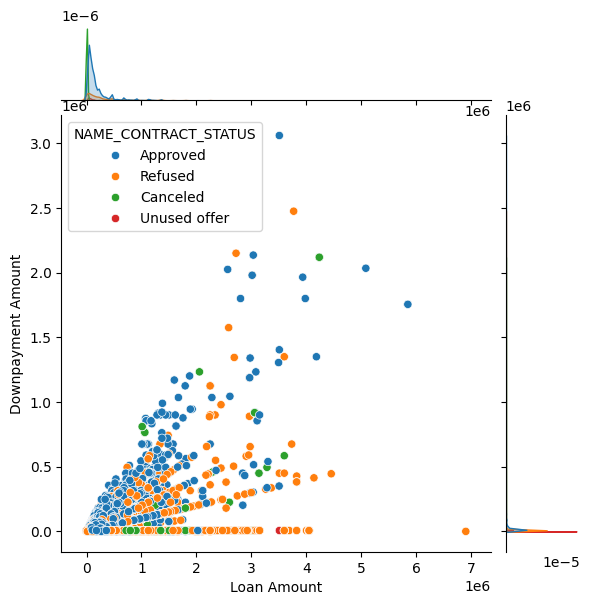

In [325]:
sns.jointplot(x='AMT_APPLICATION', y='AMT_DOWN_PAYMENT', data=new_pa_df, kind='scatter', hue = 'NAME_CONTRACT_STATUS')
plt.xlabel('Loan Amount')
plt.ylabel('Downpayment Amount')
plt.show()

**Scatter Plot 2 Insight**

1. Based on the scatter plot, it could be seen that loan amount exceeding 1 million would have a higher rate of applicant refusal towards the loan.

2. It could be inferred that due to the large sum of downpayment could be a deterent towards loan accepted by the applicant.

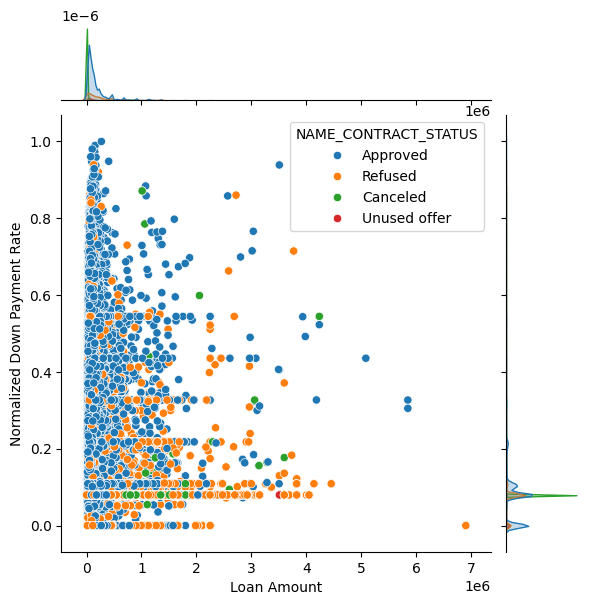

In [326]:
sns.jointplot(x='AMT_APPLICATION', y='RATE_DOWN_PAYMENT', data=new_pa_df, kind='scatter', hue = 'NAME_CONTRACT_STATUS')
plt.xlabel('Loan Amount')
plt.ylabel('Normalized Down Payment Rate')
plt.show()

**Target variable correlation**

Based on the graph below, it can be seen that that the correlation of the dependent variable to the independent variable is sort in a descending order.

<Axes: title={'center': 'Independent variable Correlation to Dependent Variable'}>

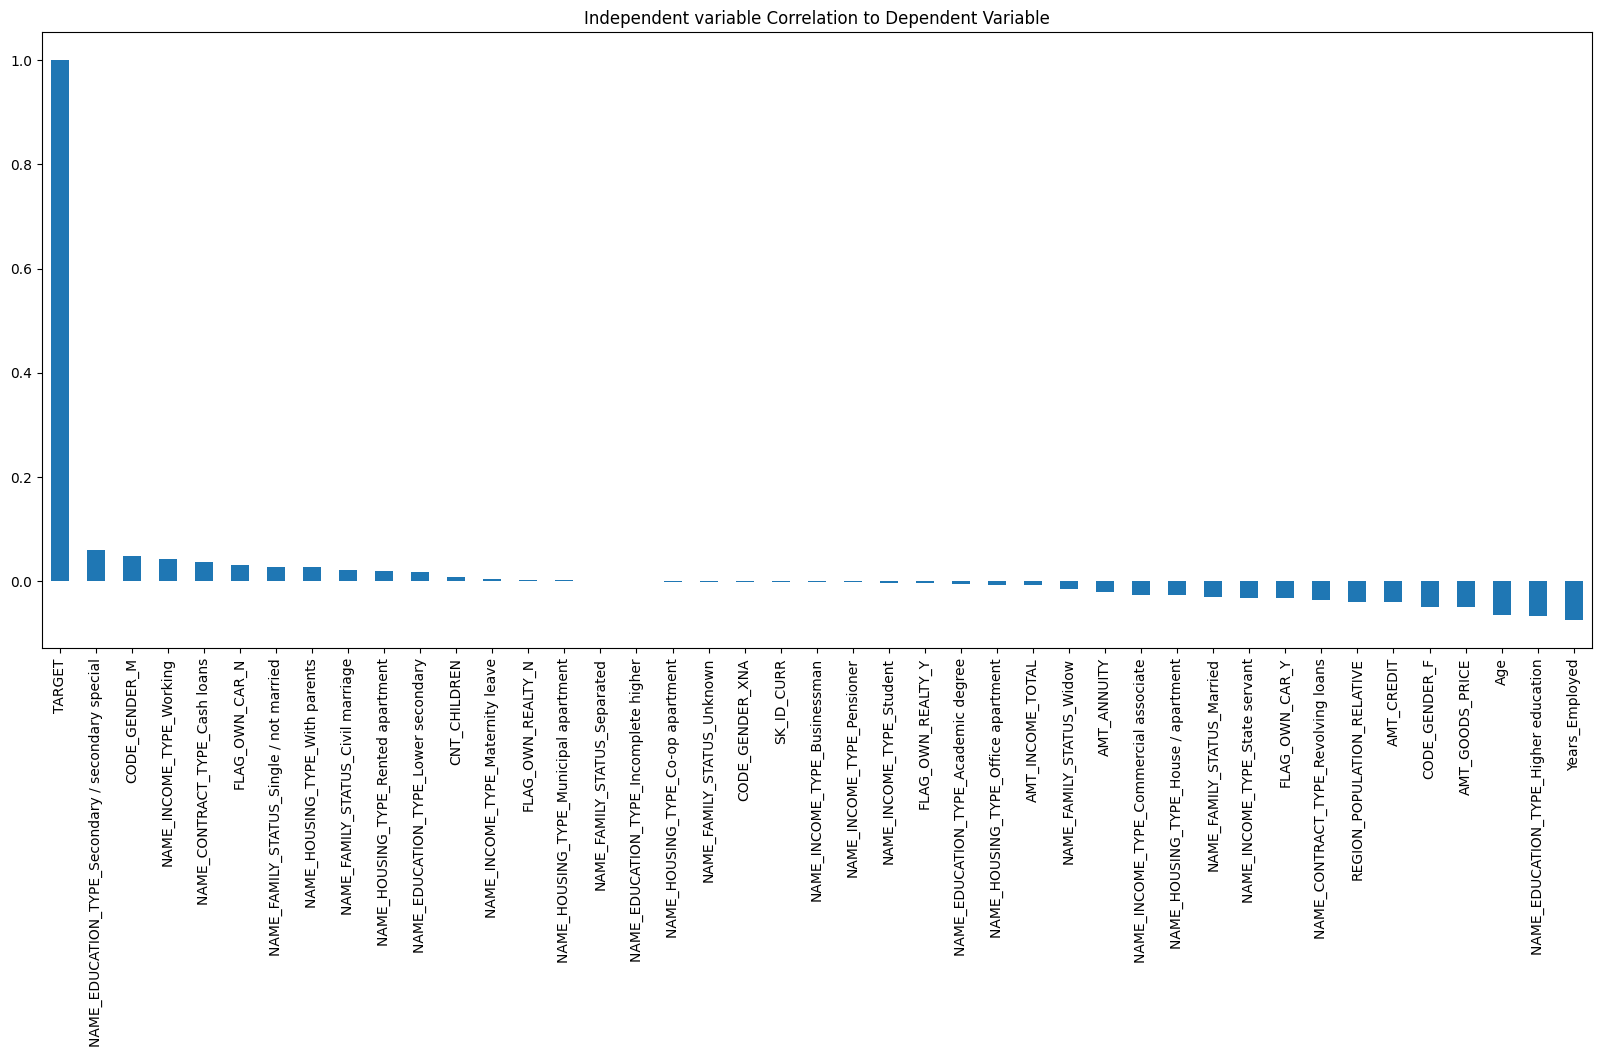

In [327]:
plt.figure(figsize=(20,8))
plt.title('Independent variable Correlation to Dependent Variable')
new_df_dummies.corr()['TARGET'].sort_values(ascending = False).plot(kind='bar')

## Multivariate Analysis 

**1. Heatmap of Applicant Data**

The heatmap below show the correlation of among all variable.

<Axes: title={'center': 'Correlation Heatmap of Applicant Data'}>

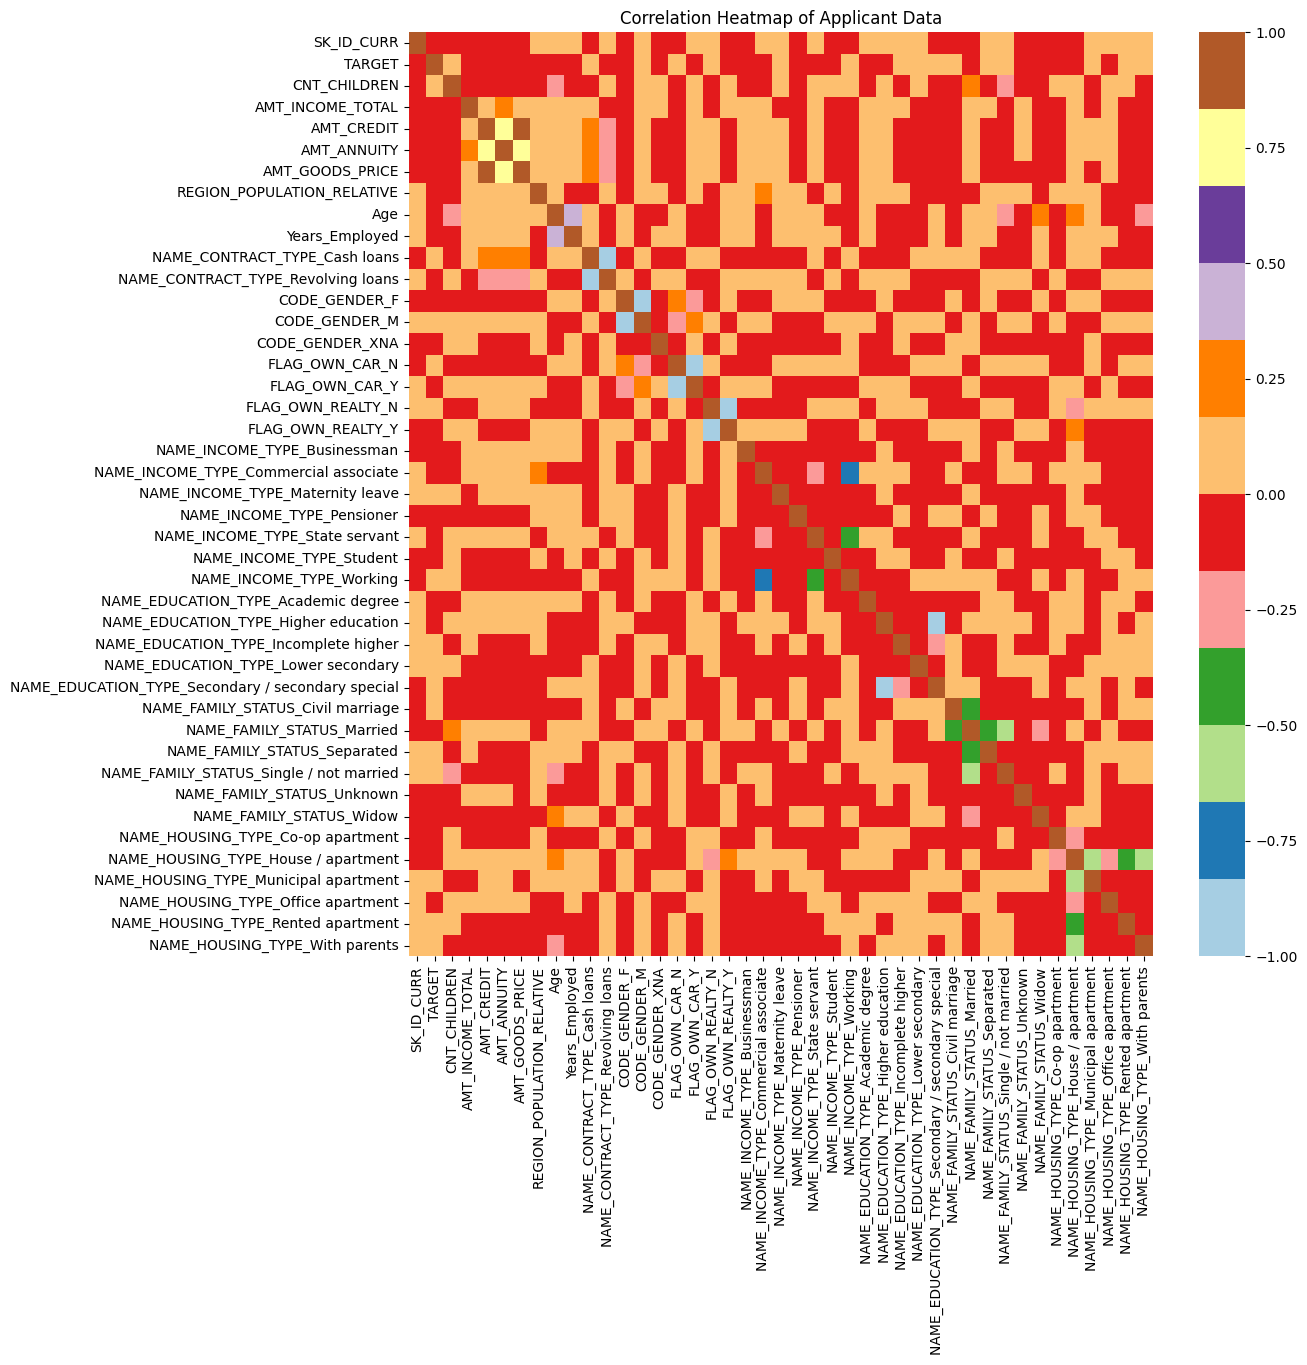

In [328]:
plt.figure(figsize=(12,12))
plt.title('Correlation Heatmap of Applicant Data')
sns.heatmap(new_df_dummies.corr(), cmap="Paired")

**2.1 Pairplot of Applicant Data**

The pairplot below show multiple variable in a scatter plot format.

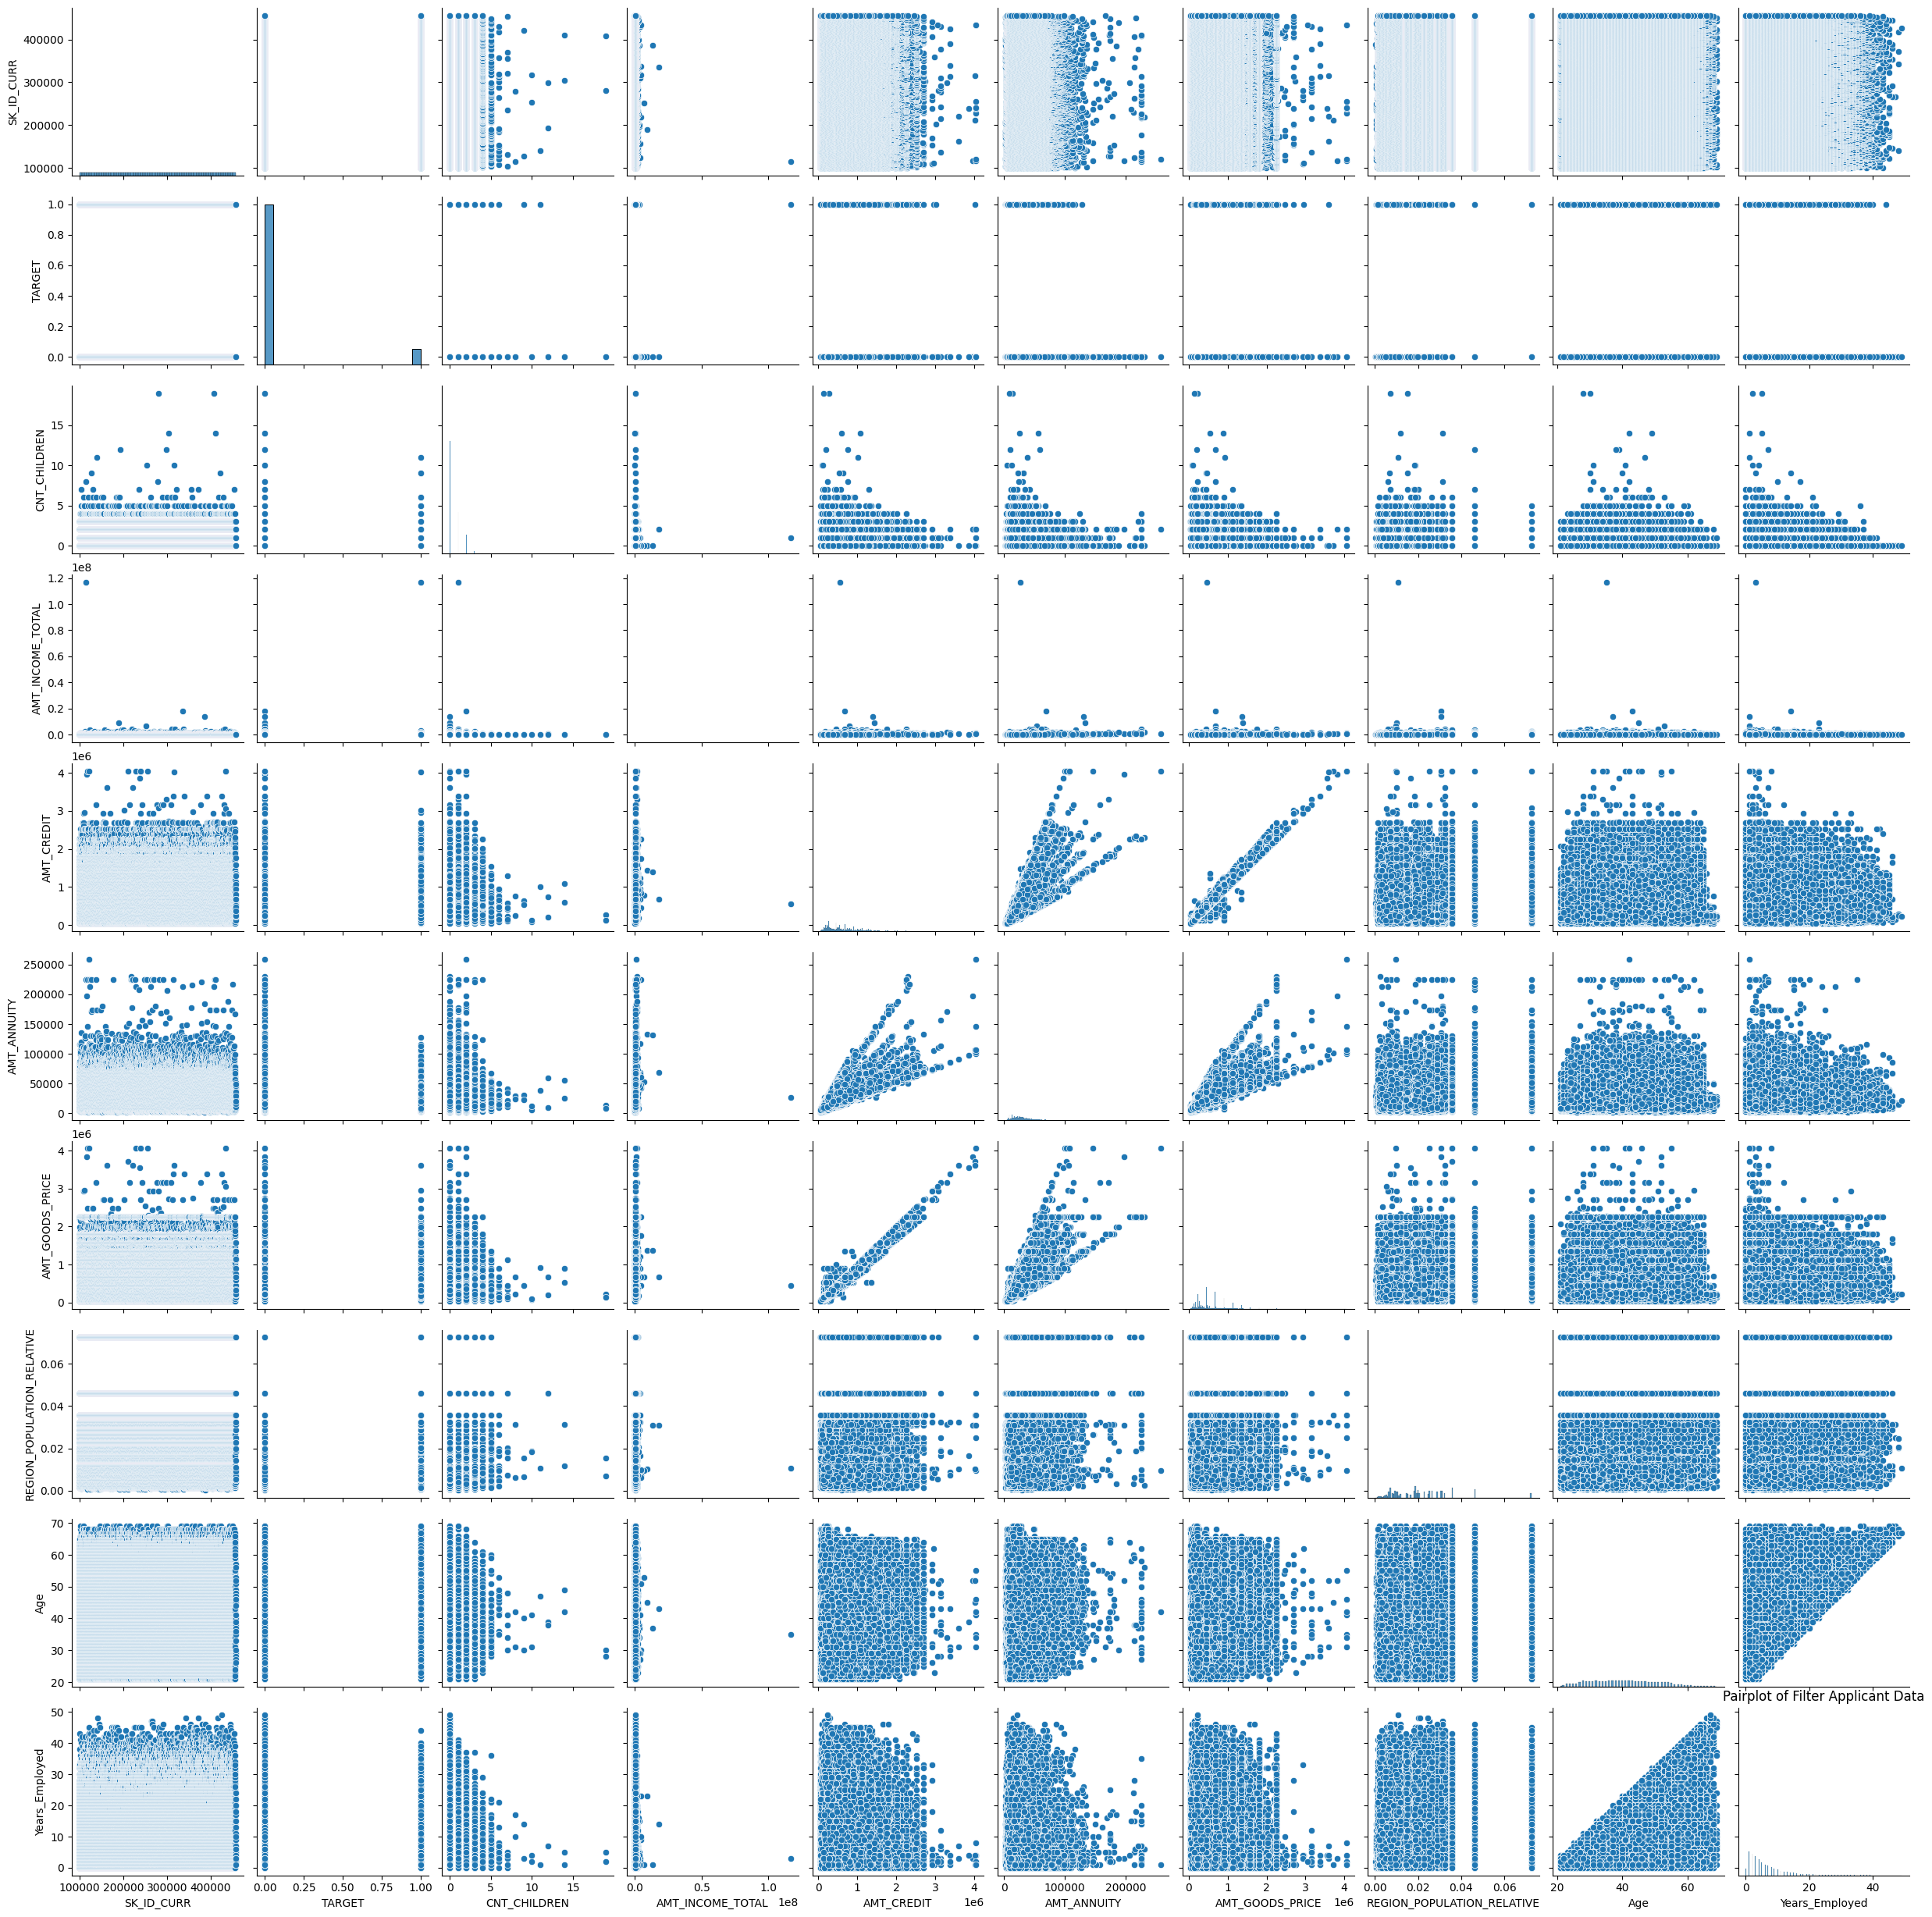

In [329]:
sns.pairplot(filter_ad_df)
plt.title('Pairplot of Filter Applicant Data')
plt.show()

**2.2 Pairplot of Past Applicant Data**

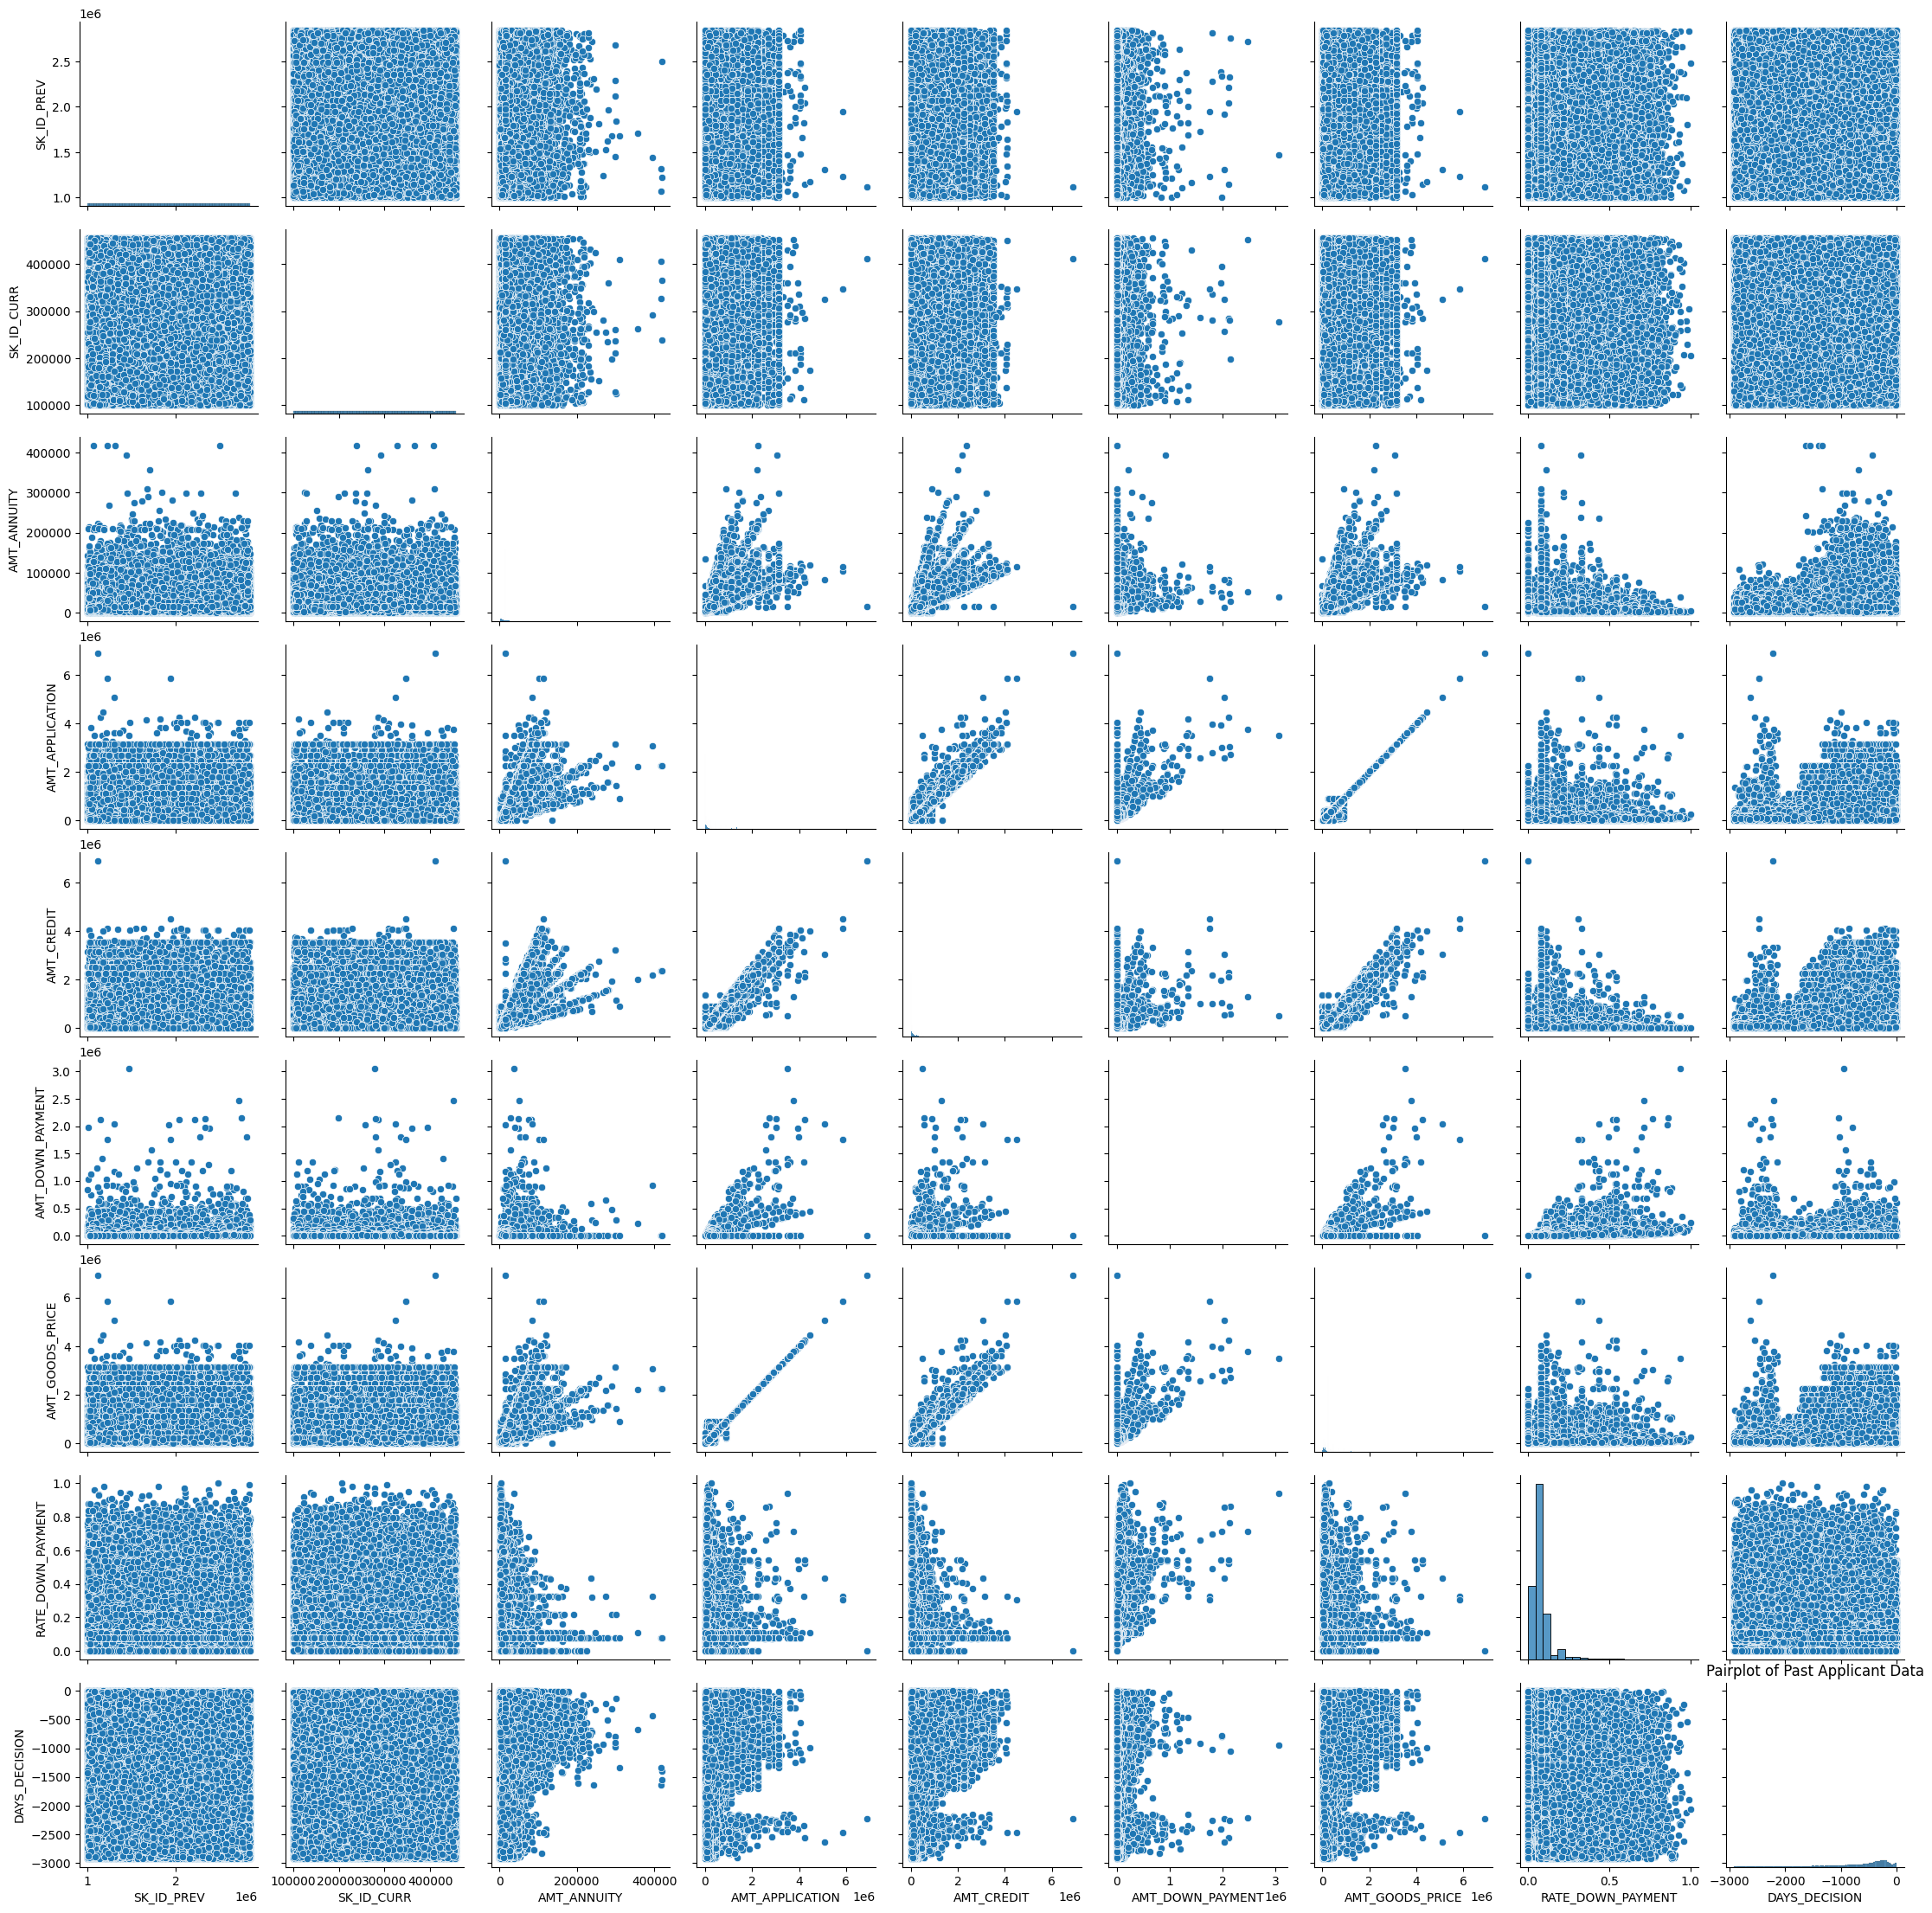

In [330]:
sns.pairplot(new_pa_df)
plt.title('Pairplot of Past Applicant Data')
plt.show()

**3. Factor Analysis**

This multivariate analysis is used for data reduction.

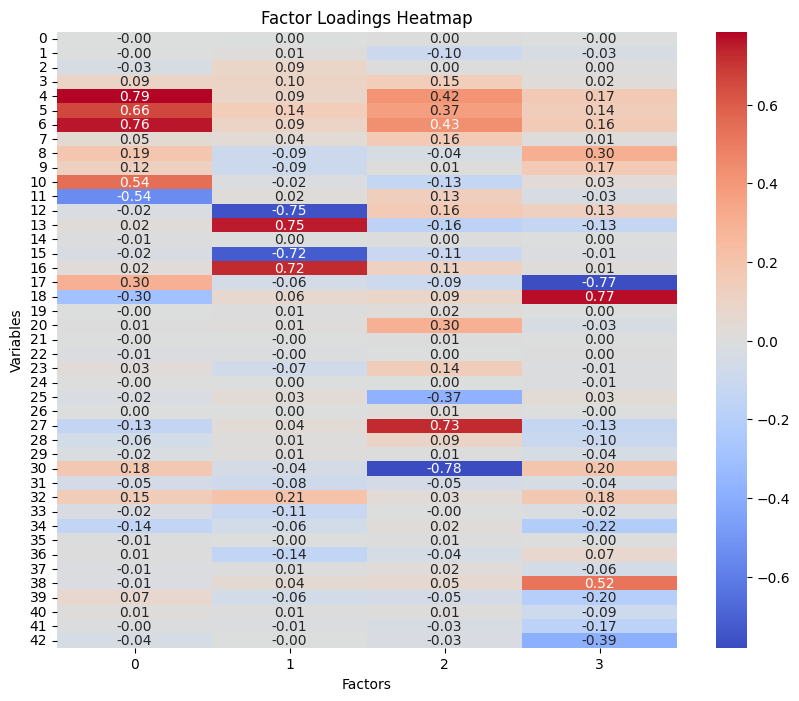

In [331]:
# Factor Analysis
fa = FactorAnalyzer(n_factors=4, rotation='varimax')
fa.fit(new_df_dummies)

factor_loadings = fa.loadings_
plt.figure(figsize=(10, 8))
sns.heatmap(factor_loadings, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Factor Loadings Heatmap')
plt.xlabel('Factors')
plt.ylabel('Variables')
plt.show()

## Findings

**Research Question 1**

*What are the demographic factors that influence the chances of a client having difficulty repaying on a loan?*

Based on the initial stages of EDA, it can be observed that demographics such as income type and family status have a correlation with an applicant's difficulty in repaying debt. Specifically, applicants who were employed had the highest probability of facing difficulty repaying the debt, followed by state servants, commercial associates, and pensioners.

By adopting a data-driven approach, the financial institution could develop an algorithm to determine the probability of an applicant having difficulty repaying a loan based on several demographic factors. This would enable more informed decision-making and better risk management.

**Income Type**

| Income Type           | % of applicant having difficulty |
| --------------------- |:--------------------------------:|
| Working               | 10.6%                            |
| Commercial Associcate | 6.11%                            |
| State Servant         | 8.09%                            |
| Pensioner             | 5.69%                            |

**Family Status**

| Family Status         | % of applicant having difficulty |
| --------------------- |:--------------------------------:|
| Not Married           | 10.9%                            |
| Married               | 8.2%                             |
| Civil Marriage        | 11.04%                           |
| Widow                 | 6.18%                            |
| Seperated             | 8.93%                            |

**Research Question 2**

*2. What are the top 10 factors for client with difficulty in paying the loan?*

Based on the correlation graph shown below, the following variables exhibit the highest positive and negative correlations with the target dependent variable, which is the applicant defaulting on the loan.

The top 5 variables with a direct positive correlation with loan defaulting are:

*1. Education Level*

*2. Gender*

*3. Income Type*

*4. Cash Loan*

*5. Younger Age*

These variables significantly influence the likelihood of an applicant defaulting on a loan. Understanding these correlations can help in developing more accurate predictive models and risk assessments.

<Axes: title={'center': 'Independent variable Correlation to Dependent Variable'}>

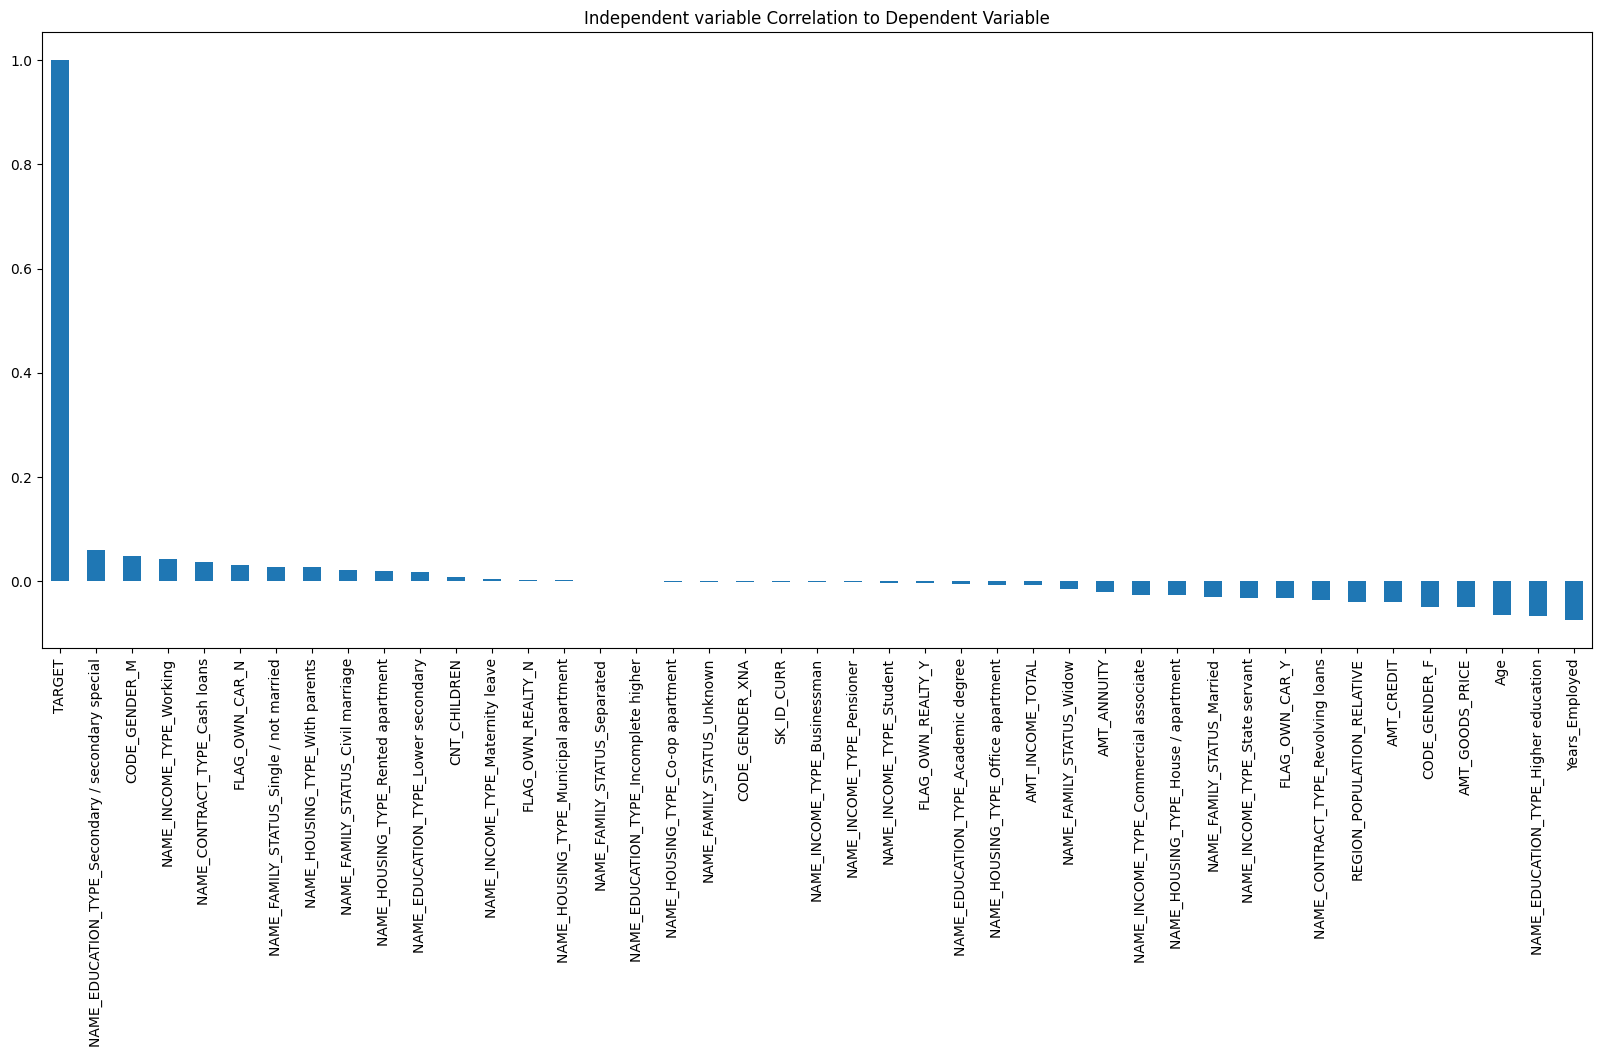

In [332]:
plt.figure(figsize=(20,8))
plt.title('Independent variable Correlation to Dependent Variable')
new_df_dummies.corr()['TARGET'].sort_values(ascending = False).plot(kind='bar')

****

# Conclusion

In conclusion, a simple Exploratory Data Analysis (EDA) was conducted based on the available data from the dataset. Several challenges were encountered with the current approach, particularly the absence of important data such as the interest rate of the loan. Due to missing values exceeding 75%, this variable had to be removed. Despite these challenges, the current EDA demonstrates a positive correlation between demographic factors and the probability of an applicant defaulting on a loan. The correlation matrix was used as a statistical method to illustrate the relationships between the dependent and independent variables.

### Recommendations

**Future Analysis**

1. Statistical Modeling 

For further analysis, statistical modeling can be a valuable alternative for feature selection. The current approach does not necessarily exhibit the best method for feature selection; it merely explores the relationship between variables. Therefore, statistical approaches such as forward selection, backward elimination, stepwise selection, and best subset selection could be implemented to identify the optimal features for modeling.

2. Data Reduction

To address the challenge of too many variables, techniques such as Principal Component Analysis (PCA) and factor analysis can be employed for data reduction. These methods allow for easier interpretation of the variables and facilitate the development of better models.

3. Applicant Screening

 The company could develop a predictive model to screen future applicants. By building a predictive model, applicant submissions can be evaluated based on their predicted probability of loan default. Future analysis should focus on identifying the best algorithm that yields the highest accuracy for this purpose.